# *Aya Shibbi -- Senior Project - 2024*

# **Voice-To-Text Emotion Detection**
*Unbalanced + NonLemmatized Text*

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# unbalanced - nonlemmatized text
my_csv_nonLem = "/content/drive/MyDrive/AyaShibbi_SeniorProject_2024_LIU/Part2_Emotion_Detection/Datasets/Unbalanced/Preprocessed_Text/unbalanced_filtered_text_ds.csv"

Mounted at /content/drive


In [ ]:
# install toolkit
!pip install nltk

In [ ]:
import pandas as pd
import numpy as np
import string

import matplotlib.pyplot as plt
import seaborn as sns

import nltk

from wordcloud import WordCloud
from collections import Counter

In [ ]:
# load the nonlemmatized dataset from the CSV file into a pandas DataFrame
csv_nonLem = pd.read_csv(my_csv_nonLem)
df_nonLem = pd.DataFrame(csv_nonLem)

## **2. Emotion Detection**

### Exploratory Data Analysis (EDA)

In [ ]:
# view all data in the dataframe
print(df_nonLem)

                                                    text  label description  \
0                                i didnt feel humiliated      0         sad   
1      i can go from feeling so hopeless to so damned...      0         sad   
2       im grabbing a minute to post i feel greedy wrong      3       anger   
3      i am ever feeling nostalgic about the fireplac...      2        love   
4                                   i am feeling grouchy      3       anger   
...                                                  ...    ...         ...   
15995  i just had a very brief time in the beanbag an...      0         sad   
15996  i am now turning and i feel pathetic that i am...      0         sad   
15997                     i feel strong and good overall      1         joy   
15998  i feel like this was such a rude comment and i...      3       anger   
15999  i know a lot but i feel so stupid because i ca...      0         sad   

                                            cleaned

In [ ]:
# information about the data
print(df_nonLem.info)

<bound method DataFrame.info of                                                     text  label description  \
0                                i didnt feel humiliated      0         sad   
1      i can go from feeling so hopeless to so damned...      0         sad   
2       im grabbing a minute to post i feel greedy wrong      3       anger   
3      i am ever feeling nostalgic about the fireplac...      2        love   
4                                   i am feeling grouchy      3       anger   
...                                                  ...    ...         ...   
15995  i just had a very brief time in the beanbag an...      0         sad   
15996  i am now turning and i feel pathetic that i am...      0         sad   
15997                     i feel strong and good overall      1         joy   
15998  i feel like this was such a rude comment and i...      3       anger   
15999  i know a lot but i feel so stupid because i ca...      0         sad   

                   

In [ ]:
# view columns
print(df_nonLem.columns)

Index(['text', 'label', 'description', 'cleaned_text', 'filtered_text'], dtype='object')


In [ ]:
# number of records and features
print(df_nonLem.shape)

(16000, 5)


In [ ]:
# number of null values
print(df_nonLem.isnull().sum())

text             0
label            0
description      0
cleaned_text     0
filtered_text    0
dtype: int64


In [ ]:
# view first 5 rows
print(df_nonLem.head())

                                                text  label description  \
0                            i didnt feel humiliated      0         sad   
1  i can go from feeling so hopeless to so damned...      0         sad   
2   im grabbing a minute to post i feel greedy wrong      3       anger   
3  i am ever feeling nostalgic about the fireplac...      2        love   
4                               i am feeling grouchy      3       anger   

                                        cleaned_text  \
0                            i didnt feel humiliated   
1  i can go from feeling so hopeless to so damned...   
2   im grabbing a minute to post i feel greedy wrong   
3  i am ever feeling nostalgic about the fireplac...   
4                               i am feeling grouchy   

                                       filtered_text  
0                              didnt feel humiliated  
1  go feeling hopeless damned hopeful around some...  
2          im grabbing minute post feel greedy 

In [ ]:
# view last 5 rows
print(df_nonLem.tail())

                                                    text  label description  \
15995  i just had a very brief time in the beanbag an...      0         sad   
15996  i am now turning and i feel pathetic that i am...      0         sad   
15997                     i feel strong and good overall      1         joy   
15998  i feel like this was such a rude comment and i...      3       anger   
15999  i know a lot but i feel so stupid because i ca...      0         sad   

                                            cleaned_text  \
15995  i just had a very brief time in the beanbag an...   
15996  i am now turning and i feel pathetic that i am...   
15997                     i feel strong and good overall   
15998  i feel like this was such a rude comment and i...   
15999  i know a lot but i feel so stupid because i ca...   

                                           filtered_text  
15995      brief time beanbag said anna feel like beaten  
15996  turning feel pathetic still waiting tab

In [ ]:
# average word count
average_word_count = df_nonLem['filtered_text'].str.split().str.len().mean()
print(f"Average Word Count per Text: {average_word_count:.2f}")

Average Word Count per Text: 9.33


In [ ]:
# emotion distribution
number_emotion_distribution = df_nonLem['description'].value_counts()
percentage_emotion_distribution = df_nonLem['description'].value_counts(normalize = True)

print(number_emotion_distribution) # numbers
print("-" * 30)
print(percentage_emotion_distribution) # percentages

description
joy         5362
sad         4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64
------------------------------
description
joy         0.335125
sad         0.291625
anger       0.134937
fear        0.121063
love        0.081500
surprise    0.035750
Name: proportion, dtype: float64


#### Emotion Distribution Visualization

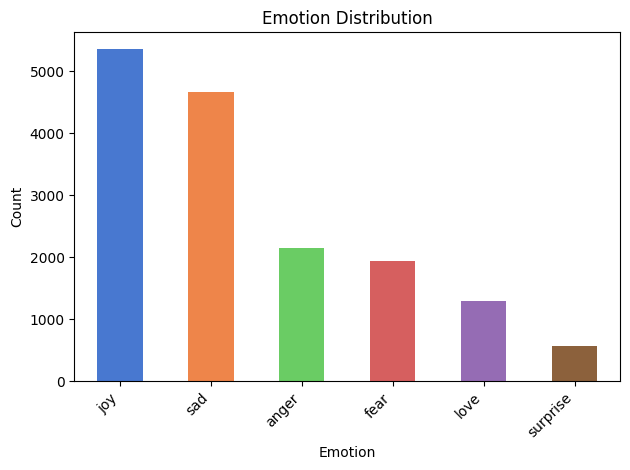

In [ ]:
# create the bar chart
number_emotion_distribution.plot(kind='bar', color=sns.color_palette("muted"))
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.title("Emotion Distribution")
plt.xticks(rotation=45, ha='right')  # rotate x-axis labels for readability
plt.tight_layout()
plt.show()

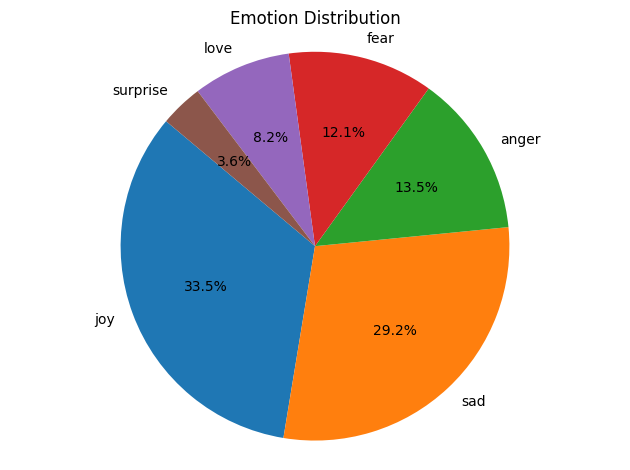

In [ ]:
# create the pie chart
plt.pie(percentage_emotion_distribution, labels=percentage_emotion_distribution.index, autopct="%1.1f%%", startangle=140)
plt.title("Emotion Distribution")
plt.axis('equal')  # equal aspect ratio for a circular pie chart
plt.tight_layout()
plt.show()

#### Overall Text Length Distribution

In [ ]:
# text length for each text (count characters)
text_lengths = df_nonLem['filtered_text'].str.len()

print(text_lengths[:5])

0    21
1    61
2    41
3    52
4    15
Name: filtered_text, dtype: int64


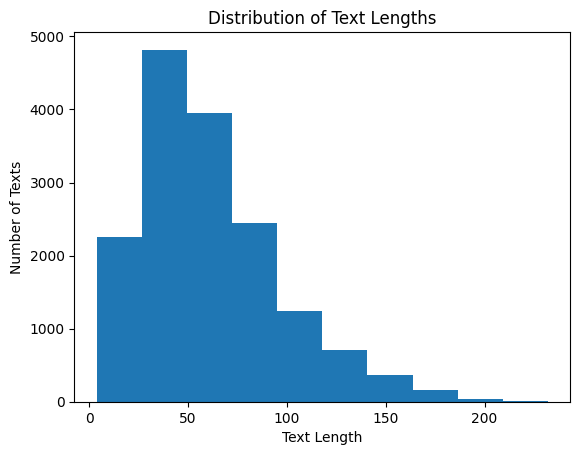

In [ ]:
# Create the histogram
plt.hist(text_lengths)
plt.xlabel("Text Length")
plt.ylabel("Number of Texts")
plt.title("Distribution of Text Lengths")
plt.show()

In [ ]:
# print the mean text length (count characters)
mean_text_length = text_lengths.mean()
print(f"Mean Text Length: {mean_text_length:.2f}")

Mean Text Length: 61.55


<ipython-input-19-2af9cc181816>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(text_lengths)


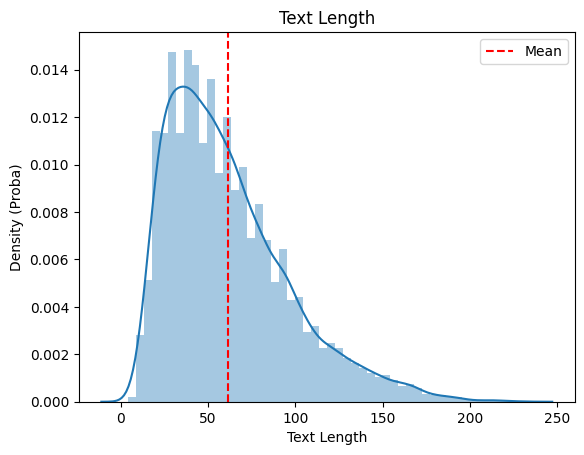

In [ ]:
# Create the distplot of Text Length
sns.distplot(text_lengths)
plt.xlabel('Text Length')
plt.ylabel('Density (Proba)')
plt.title('Text Length')
plt.axvline(mean_text_length, color='r', linestyle='dashed', linewidth=1.5, label='Mean')
plt.legend()
plt.show()

#### Word Frequency Per Text

In [ ]:
# find the text length and word count of each record
text_word_count = df_nonLem['filtered_text'].apply(lambda x: len(str(x).split())) # words

print(text_word_count[:5])

0    3
1    9
2    7
3    7
4    2
Name: filtered_text, dtype: int64


In [ ]:
# print the mean text word count
mean_text_word_count = text_word_count.mean()
print(f"Mean Text Word Count: {mean_text_word_count:.2f}")

Mean Text Word Count: 9.33


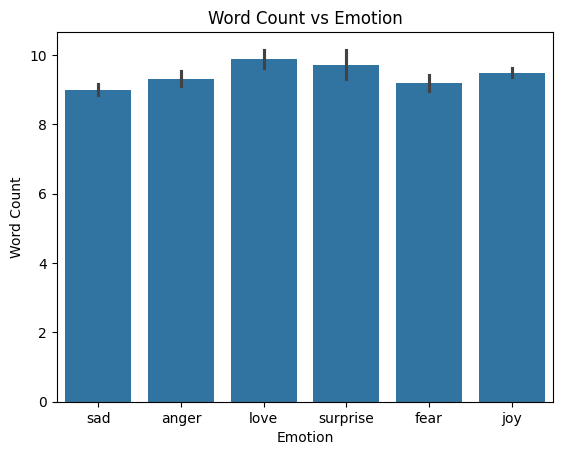

In [ ]:
# Create the barplot of Text Word Count
sns.barplot(x = df_nonLem['description'], y = text_word_count)
plt.xlabel('Emotion')
plt.ylabel('Word Count')
plt.title('Word Count vs Emotion')
plt.show()

#### **Tokenization**

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# tokenization
tokenized_text = []

for sentence in df_nonLem['filtered_text']:
  tokens = nltk.word_tokenize(sentence)
  tokenized_text.append(tokens)

print(tokenized_text[:5])

[['didnt', 'feel', 'humiliated'], ['go', 'feeling', 'hopeless', 'damned', 'hopeful', 'around', 'someone', 'cares', 'awake'], ['im', 'grabbing', 'minute', 'post', 'feel', 'greedy', 'wrong'], ['ever', 'feeling', 'nostalgic', 'fireplace', 'know', 'still', 'property'], ['feeling', 'grouchy']]


#### Word Frequency vs. Emotion

In [ ]:
from collections import Counter
def get_word_frequencies(text_list):
  word_counts = Counter()
  for text in text_list:
    word_counts.update(text)
  return word_counts

# Get word frequencies for all text
word_freqs = get_word_frequencies(tokenized_text)

print(word_freqs)

Counter({'feel': 11183, 'feeling': 5112, 'like': 2908, 'im': 2430, 'really': 942, 'know': 853, 'time': 794, 'get': 740, 'little': 736, 'people': 654, 'would': 646, 'want': 644, 'think': 596, 'one': 596, 'still': 595, 'ive': 587, 'even': 568, 'life': 551, 'make': 523, 'bit': 516, 'something': 513, 'love': 500, 'much': 496, 'going': 487, 'dont': 482, 'things': 480, 'way': 470, 'could': 453, 'day': 428, 'back': 403, 'go': 393, 'good': 393, 'pretty': 392, 'need': 387, 'always': 355, 'see': 355, 'right': 346, 'feelings': 343, 'also': 337, 'say': 333, 'today': 327, 'feels': 323, 'work': 322, 'around': 315, 'cant': 301, 'made': 296, 'got': 278, 'well': 275, 'though': 274, 'didnt': 272, 'help': 272, 'felt': 266, 'never': 264, 'every': 254, 'someone': 251, 'days': 247, 'less': 246, 'makes': 246, 'happy': 245, 'enough': 238, 'quite': 238, 'sure': 232, 'lot': 232, 'many': 232, 'away': 226, 'look': 226, 'find': 224, 'ever': 221, 'anything': 219, 'home': 218, 'kind': 215, 'better': 213, 'person': 2

In [ ]:
# Group words by emotion
emotion_word_freqs = {}
for emotion in df_nonLem['description'].unique():
  df_emotion = df_nonLem[df_nonLem['description'] == emotion]
  emotion_word_freqs[emotion] = get_word_frequencies(tokenized_text)

# Prepare data for visualization (adjust based on your needs)
top_n_words = 10  # Number of top words to visualize
emotions = list(emotion_word_freqs.keys())

word_data = []
for emotion, word_freq in emotion_word_freqs.items():
  top_words = word_freq.most_common(top_n_words)  # Get top words for this emotion
  word_data.append([word for word, _ in top_words])  # Extract just words

In [ ]:
from wordcloud import WordCloud

# Create word clouds for each emotion
for emotion, word_freq in emotion_word_freqs.items():
  word_cloud = WordCloud(width=800, height=600).generate_from_frequencies(word_freq)
  plt.figure(figsize=(8, 6))
  plt.imshow(word_cloud, interpolation='bilinear')
  plt.title(f'Word Cloud for {emotion} Text')
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

#### N-Gram Analysis

In [ ]:
# creating individual dataframes of different emotions
sadness = df_nonLem[df_nonLem['label']==0]['filtered_text']
joy = df_nonLem[df_nonLem['label']==1]['filtered_text']
love = df_nonLem[df_nonLem['label']==2]['filtered_text']
anger = df_nonLem[df_nonLem['label']==3]['filtered_text']
fear = df_nonLem[df_nonLem['label']==4]['filtered_text']
surprise = df_nonLem[df_nonLem['label']==5]['filtered_text']

In [ ]:
# code to calculate ngrams
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
# calculating unigrmas, bigrams and trigrams for all given emotions

sad_unigrams = get_top_n_gram(sadness.values,(1,1),7)[2:]
joy_unigrams= get_top_n_gram(joy.values,(1,1),7)[2:]
love_unigrams= get_top_n_gram(love.values,(1,1),7)[2:]
anger_unigrams= get_top_n_gram(anger.values,(1,1),7)[2:]
fear_unigrams= get_top_n_gram(fear.values,(1,1),7)[2:]
surprise_unigrams= get_top_n_gram(surprise.values,(1,1),7)[2:]



sad_bigrams = get_top_n_gram(sadness.values,(2,2),7)[2:]
joy_bigrams= get_top_n_gram(joy.values,(2,2),7)[2:]
love_bigrams= get_top_n_gram(love.values,(2,2),7)[2:]
anger_bigrams= get_top_n_gram(anger.values,(2,2),7)[2:]
fear_bigrams= get_top_n_gram(fear.values,(2,2),7)[2:]
surprise_bigrams= get_top_n_gram(surprise.values,(2,2),7)[2:]


sad_trigrams = get_top_n_gram(sadness.values,(3,3),7)[2:]
joy_trigrams= get_top_n_gram(joy.values,(3,3),7)[2:]
love_trigrams= get_top_n_gram(love.values,(3,3),7)[2:]
anger_trigrams= get_top_n_gram(anger.values,(3,3),7)[2:]
fear_trigrams= get_top_n_gram(fear.values,(3,3),7)[2:]
surprise_trigrams= get_top_n_gram(surprise.values,(3,3),7)[2:]

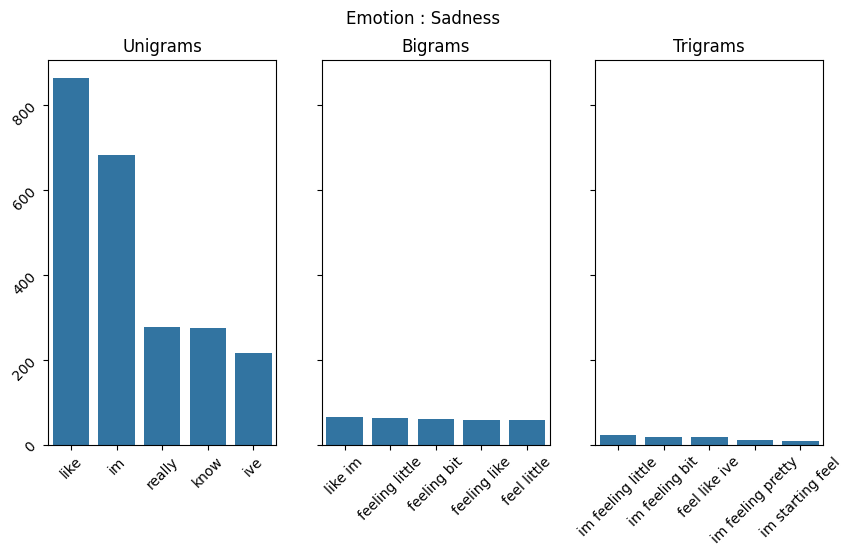

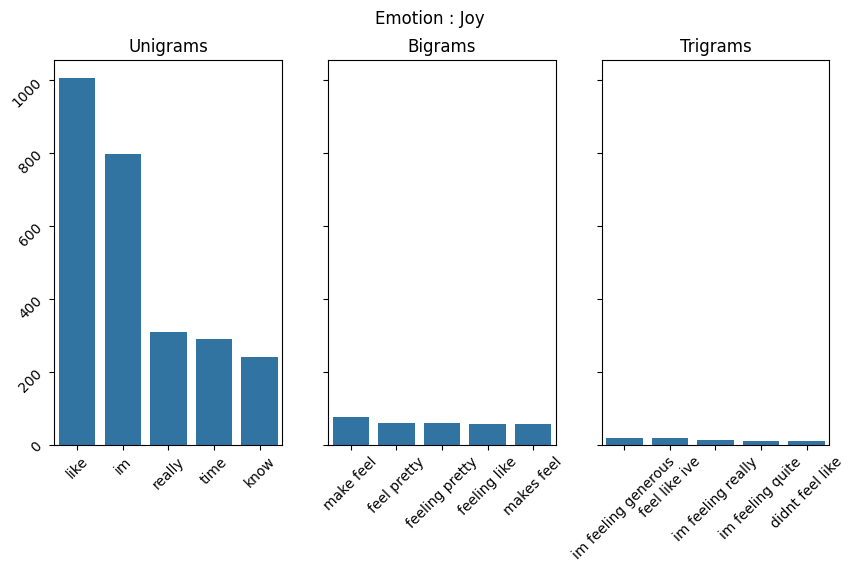

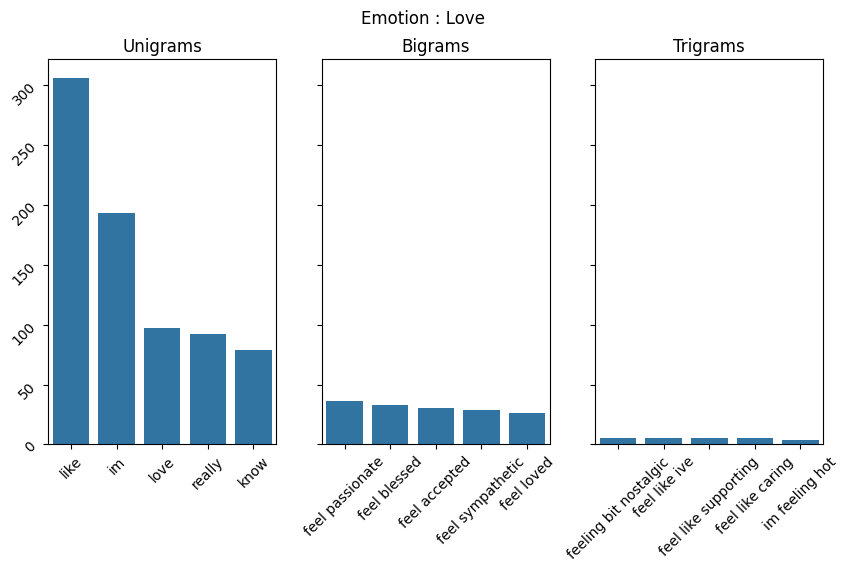

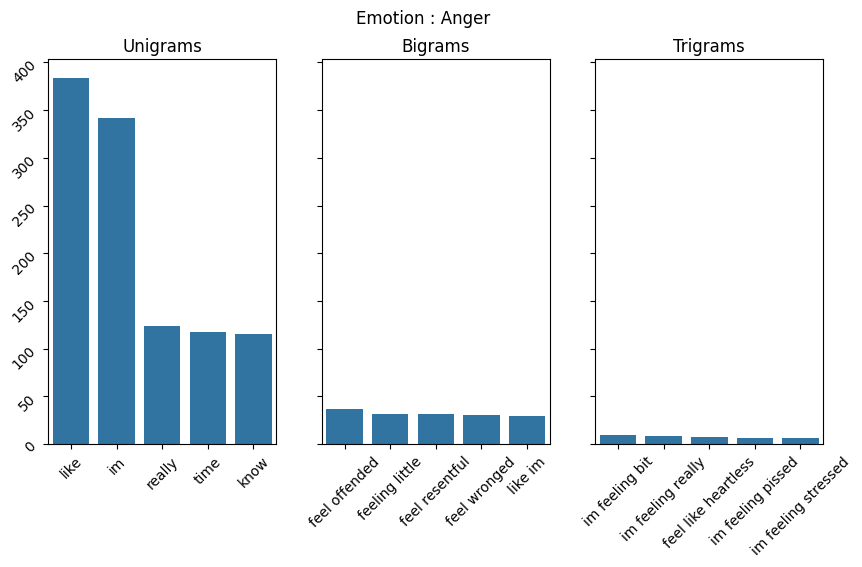

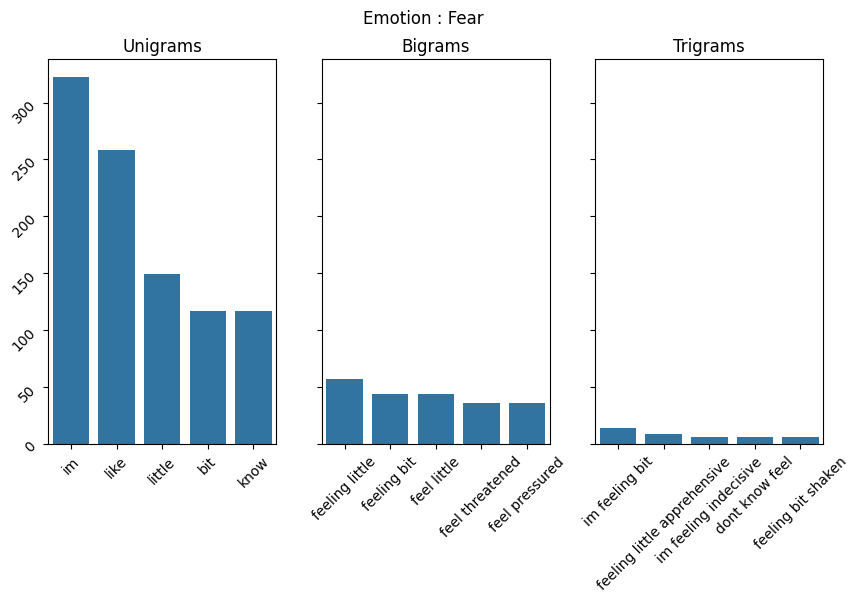

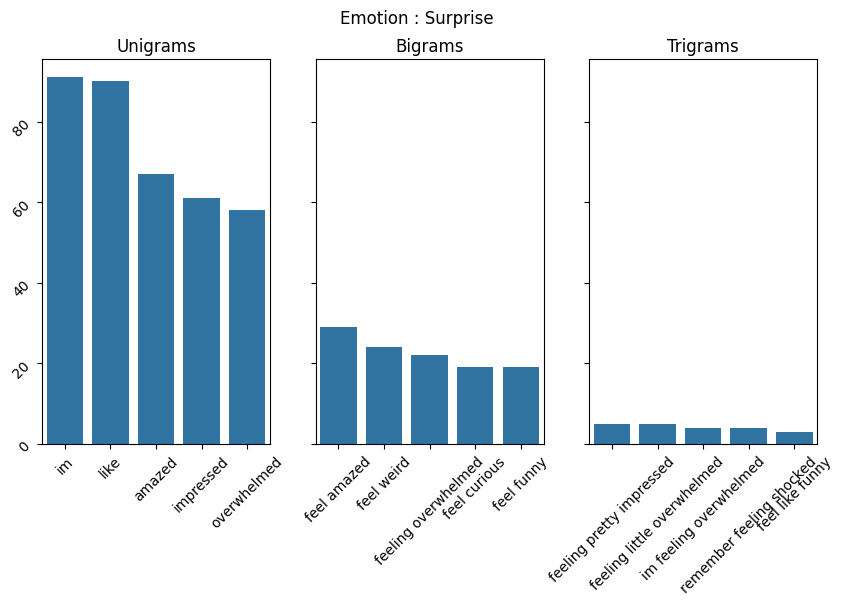

In [ ]:
# visualizing the ngrams for the emotions
#Sadness
fig, axes = plt.subplots(1, 3, figsize=(10, 5), sharey=True)
fig.suptitle('Emotion : Sadness')



sns.barplot(x=list(dict(sad_unigrams).keys()), y=list(dict(sad_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)



sns.barplot(x=list(dict(sad_bigrams).keys()), y=list(dict(sad_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)



sns.barplot(x=list(dict(sad_trigrams).keys()), y=list(dict(sad_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)
fig.savefig('sadness.png')


#Joy
fig, axes = plt.subplots(1, 3, figsize=(10, 5), sharey=True)
fig.suptitle('Emotion : Joy')

sns.barplot(x=list(dict(joy_unigrams).keys()), y=list(dict(joy_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot(x=list(dict(joy_bigrams).keys()), y=list(dict(joy_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)


sns.barplot(x=list(dict(joy_trigrams).keys()), y=list(dict(joy_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)
fig.savefig('joy.png')

#Love
fig, axes = plt.subplots(1, 3, figsize=(10, 5), sharey=True)
fig.suptitle('Emotion : Love')

sns.barplot(x=list(dict(love_unigrams).keys()), y=list(dict(love_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot(x=list(dict(love_bigrams).keys()), y=list(dict(love_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)



sns.barplot(x=list(dict(love_trigrams).keys()), y=list(dict(love_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)


#Anger
fig, axes = plt.subplots(1, 3, figsize=(10, 5), sharey=True)
fig.suptitle('Emotion : Anger')

sns.barplot(x=list(dict(anger_unigrams).keys()), y=list(dict(anger_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot(x=list(dict(anger_bigrams).keys()), y=list(dict(anger_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)



sns.barplot(x=list(dict(anger_trigrams).keys()), y=list(dict(anger_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)


#Fear
fig, axes = plt.subplots(1, 3, figsize=(10, 5), sharey=True)
fig.suptitle('Emotion : Fear')

sns.barplot(x=list(dict(fear_unigrams).keys()), y=list(dict(fear_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot(x=list(dict(fear_bigrams).keys()), y=list(dict(fear_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)


sns.barplot(x=list(dict(fear_trigrams).keys()), y=list(dict(fear_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)
fig.savefig('fear.png')


#Surprise
fig, axes = plt.subplots(1, 3, figsize=(10, 5), sharey=True)
fig.suptitle('Emotion : Surprise')

sns.barplot(x=list(dict(surprise_unigrams).keys()), y=list(dict(surprise_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot(x=list(dict(surprise_bigrams).keys()), y=list(dict(surprise_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)


sns.barplot(x=list(dict(surprise_trigrams).keys()), y=list(dict(surprise_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)
fig.savefig('suprise.png')

### **Vectorization (convert text to numerical values)**

In [ ]:
non_lemmatized_text_data = df_nonLem['filtered_text']

#### CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# unigram --> 1
countVectorizer_n1 = CountVectorizer()

In [ ]:
# unigram & bigram --> 1 & 2
countVectorizer_n2 = CountVectorizer(ngram_range= (1,2))

In [ ]:
# bigram --> 2
countVectorizer_n3 = CountVectorizer(ngram_range= (2,2))

##### Unigram

In [ ]:
countVectorizer_n1.fit(non_lemmatized_text_data)
X_CV_n1_nonlem = countVectorizer_n1.transform(non_lemmatized_text_data)

print(X_CV_n1_nonlem.shape)

(16000, 15042)


##### Unigram and Bigram

In [ ]:
countVectorizer_n2.fit(non_lemmatized_text_data)
X_CV_n2_nonlem = countVectorizer_n2.transform(non_lemmatized_text_data)

print(X_CV_n2_nonlem.shape)

(16000, 110296)


##### Bigram

In [ ]:
countVectorizer_n3.fit(non_lemmatized_text_data)
X_CV_n3_nonlem = countVectorizer_n3.transform(non_lemmatized_text_data)

print(X_CV_n3_nonlem.shape)

(16000, 95254)


#### TfidfVectorizer (Term Frequency-Inverse Document Frequency)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# unigram --> 1
tfidfVectorizer_n1 = TfidfVectorizer()

In [ ]:
# unigram & bigram --> 1 & 2
tfidfVectorizer_n2 = TfidfVectorizer(ngram_range= (1,2))

In [ ]:
# bigram --> 2
tfidfVectorizer_n3 = TfidfVectorizer(ngram_range= (2,2))

##### Unigram

In [ ]:
tfidfVectorizer_n1.fit(non_lemmatized_text_data)
X_TfIdf_n1_nonlem = tfidfVectorizer_n1.transform(non_lemmatized_text_data)

print(X_TfIdf_n1_nonlem.shape)

(16000, 15042)


##### Unigram and Bigram

In [ ]:
tfidfVectorizer_n2.fit(non_lemmatized_text_data)
X_TfIdf_n2_nonlem = tfidfVectorizer_n2.transform(non_lemmatized_text_data)

print(X_TfIdf_n2_nonlem.shape)

(16000, 110296)


##### Bigram

In [ ]:
tfidfVectorizer_n3.fit(non_lemmatized_text_data)
X_TfIdf_n3_nonlem = tfidfVectorizer_n3.transform(non_lemmatized_text_data)

print(X_TfIdf_n3_nonlem.shape)

(16000, 95254)


### **Training Model -- Traditional ML Algorithms**

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

In [ ]:
# split X and y into training and testing sets
def split_X_y(X):
  X = X
  y = df_nonLem['label']

  # split X and y into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

  return X_train, X_test, y_train, y_test

In [ ]:
def confusion_matrix(cnf_matrix):
  class_names=[0, 1, 2, 3, 4, 5] # name  of classes
  fig, ax = plt.subplots()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)

  # create heatmap
  sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
  ax.xaxis.set_label_position("top")
  plt.tight_layout()
  plt.title('Confusion matrix', y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

#### *Naive Bayes*

In [ ]:
# import NB model
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
def NB_model(X_train, y_train, X_test):
  # feature selection
  selector = SelectKBest(chi2, k=1000)
  X_train_selected = selector.fit_transform(X_train, y_train)
  X_test_selected = selector.transform(X_test)

  # create a naive bayes classifier
  nb = MultinomialNB(alpha=0.1)

  # train the model using the training sets
  nb.fit(X_train_selected, y_train)

  y_pred = nb.predict(X_test_selected)

  return y_pred

##### CounterVectorizer -- Unigram(n1)

In [ ]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n1_nonlem)

In [ ]:
y_pred = NB_model(X_train, y_train, X_test)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[867  31   5  23  15   2]
 [ 25 987  30  10  11  10]
 [  2  73 191   2   3   0]
 [ 18  19   3 388  11   1]
 [ 18  17   4   9 316   4]
 [  4  12   1   1  20  67]]


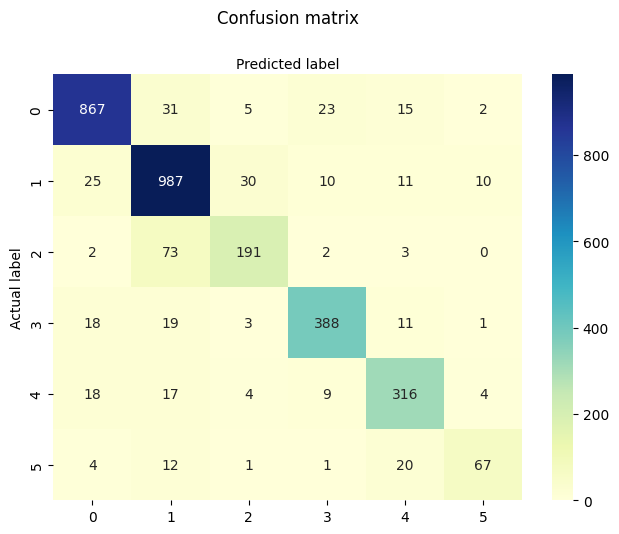

In [ ]:
confusion_matrix(cnf_matrix)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.93      0.92      0.92       943
     Sadness       0.87      0.92      0.89      1073
       Anger       0.82      0.70      0.76       271
        Fear       0.90      0.88      0.89       440
        Love       0.84      0.86      0.85       368
   Surprised       0.80      0.64      0.71       105

    accuracy                           0.88      3200
   macro avg       0.86      0.82      0.84      3200
weighted avg       0.88      0.88      0.88      3200



##### CounterVectorizer -- Unigram and Bigram(n2)

In [ ]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n2_nonlem)

In [ ]:
y_pred = NB_model(X_train, y_train, X_test)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[ 873   38    4   17   11    0]
 [  10 1010   34    5    7    7]
 [   2   44  224    0    1    0]
 [   8   24    1  399    8    0]
 [  10   14    0   11  321   12]
 [   1    7    2    0   13   82]]


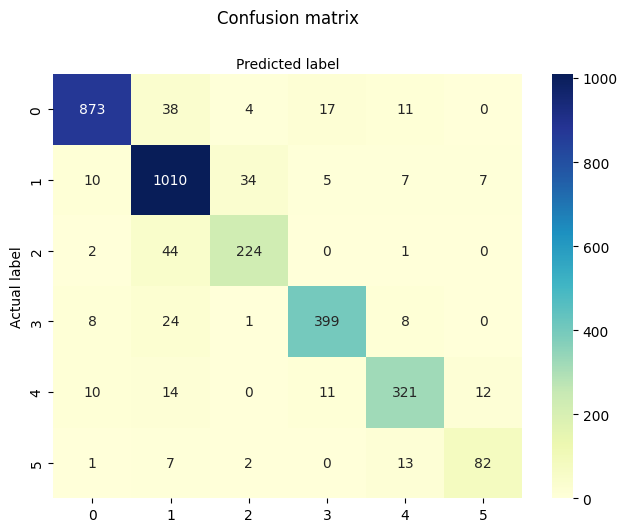

In [ ]:
confusion_matrix(cnf_matrix)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.97      0.93      0.95       943
     Sadness       0.89      0.94      0.91      1073
       Anger       0.85      0.83      0.84       271
        Fear       0.92      0.91      0.92       440
        Love       0.89      0.87      0.88       368
   Surprised       0.81      0.78      0.80       105

    accuracy                           0.91      3200
   macro avg       0.89      0.88      0.88      3200
weighted avg       0.91      0.91      0.91      3200



##### CounterVectorizer -- Bigram(n3)

In [ ]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n3_nonlem)

In [ ]:
y_pred = NB_model(X_train, y_train, X_test)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[ 363  569    1    4    4    2]
 [  12 1052    3    0    1    5]
 [   1  175   95    0    0    0]
 [  17  243    0  178    2    0]
 [  14  147    0    5  198    4]
 [   3   47    0    0   20   35]]


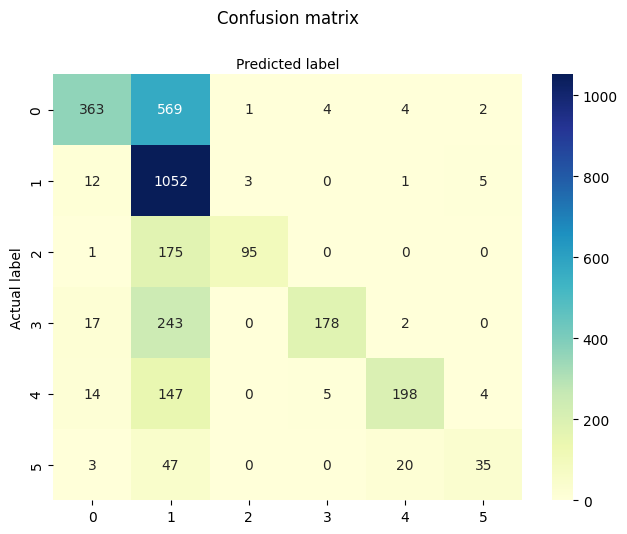

In [ ]:
confusion_matrix(cnf_matrix)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.89      0.38      0.54       943
     Sadness       0.47      0.98      0.64      1073
       Anger       0.96      0.35      0.51       271
        Fear       0.95      0.40      0.57       440
        Love       0.88      0.54      0.67       368
   Surprised       0.76      0.33      0.46       105

    accuracy                           0.60      3200
   macro avg       0.82      0.50      0.56      3200
weighted avg       0.76      0.60      0.59      3200



##### TfidfVectorizer -- Unigram(n1)

In [ ]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n1_nonlem)

In [ ]:
y_pred = NB_model(X_train, y_train, X_test)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[ 892   40    0    7    4    0]
 [  21 1045    3    4    0    0]
 [  25  141  102    2    1    0]
 [  48   54    0  331    6    1]
 [  42   51    2   14  258    1]
 [  20   53    0    1   15   16]]


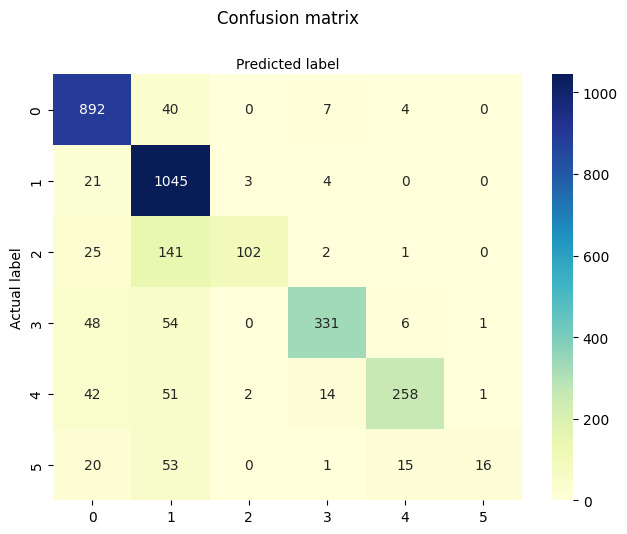

In [ ]:
confusion_matrix(cnf_matrix)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.85      0.95      0.90       943
     Sadness       0.76      0.97      0.85      1073
       Anger       0.95      0.38      0.54       271
        Fear       0.92      0.75      0.83       440
        Love       0.91      0.70      0.79       368
   Surprised       0.89      0.15      0.26       105

    accuracy                           0.83      3200
   macro avg       0.88      0.65      0.69      3200
weighted avg       0.85      0.83      0.81      3200



##### TfidfVectorizer -- Unigram and Bigram(n2)

In [ ]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n2_nonlem)

In [ ]:
y_pred = NB_model(X_train, y_train, X_test)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[ 877   65    0    1    0    0]
 [   8 1063    0    0    2    0]
 [  18  175   78    0    0    0]
 [  69  103    0  265    3    0]
 [  53   88    0   12  213    2]
 [   8   64    0    1   17   15]]


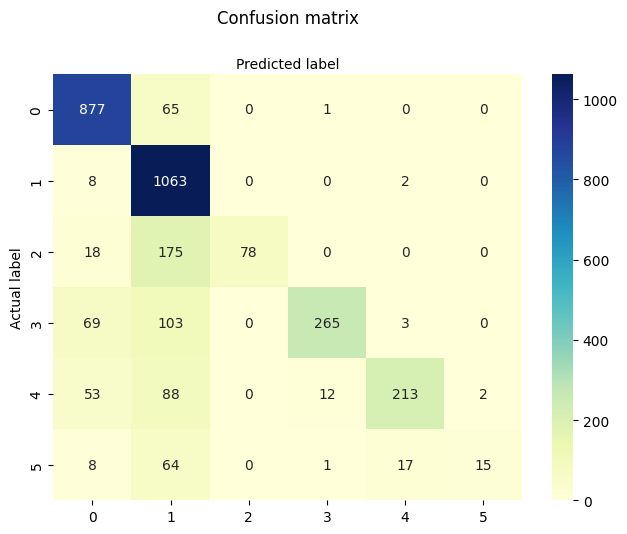

In [ ]:
confusion_matrix(cnf_matrix)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.85      0.93      0.89       943
     Sadness       0.68      0.99      0.81      1073
       Anger       1.00      0.29      0.45       271
        Fear       0.95      0.60      0.74       440
        Love       0.91      0.58      0.71       368
   Surprised       0.88      0.14      0.25       105

    accuracy                           0.78      3200
   macro avg       0.88      0.59      0.64      3200
weighted avg       0.83      0.78      0.76      3200



##### TfidfVectorizer -- Bigram(n3)





In [ ]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n3_nonlem)

In [ ]:
y_pred = NB_model(X_train, y_train, X_test)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[ 353  590    0    0    0    0]
 [   6 1064    1    1    1    0]
 [   1  232   38    0    0    0]
 [   9  276    0  154    1    0]
 [  18  211    0    7  132    0]
 [   2   88    0    0   14    1]]


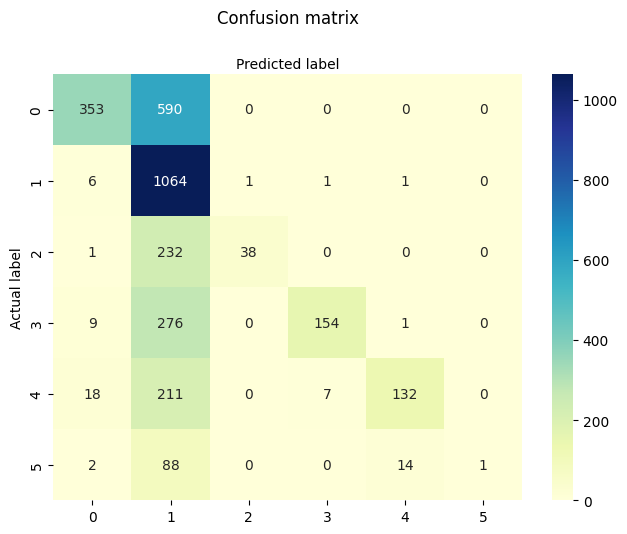

In [ ]:
confusion_matrix(cnf_matrix)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.91      0.37      0.53       943
     Sadness       0.43      0.99      0.60      1073
       Anger       0.97      0.14      0.25       271
        Fear       0.95      0.35      0.51       440
        Love       0.89      0.36      0.51       368
   Surprised       1.00      0.01      0.02       105

    accuracy                           0.54      3200
   macro avg       0.86      0.37      0.40      3200
weighted avg       0.76      0.54      0.51      3200



#### *K-Nearest Neighbor (KNN)*

In [ ]:
# import KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
def find_optimal_k(X_train, y_train, X_test, y_test):
  # Find the optimal value of k
  max_k = min(15, X_train.shape[0]) # Limit the maximum value of k to avoid overfitting
  best_accuracy = 0
  best_k = 0
  accuracy_values = []
  k_values = []
  for k in range(1, max_k+1):
    knn = KNeighborsClassifier(n_neighbors=k)
    scaler = StandardScaler(with_mean=False)
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)
    k_values.append(k)
    if accuracy > best_accuracy:
      best_accuracy = accuracy
      best_k = k

  return best_k

In [ ]:
def KNN_model(X_train, y_train, X_test, best_k):
  # Train the KNN classifier using the optimal value of k
  scaler = StandardScaler(with_mean=False)
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)
  knn = KNeighborsClassifier(n_neighbors=best_k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)

  return y_pred

##### CounterVectorizer - Unigram(n1)

In [ ]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n1_nonlem)

In [ ]:
best_k = find_optimal_k(X_train, y_train, X_test, y_test)

In [ ]:
y_pred = KNN_model(X_train, y_train, X_test, best_k)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[679 119  44  53  36  12]
 [190 688  75  52  50  18]
 [ 65  70 103  16  14   3]
 [ 91  65  33 228  20   3]
 [ 83  56  28  38 148  15]
 [ 19  16   7  10  17  36]]


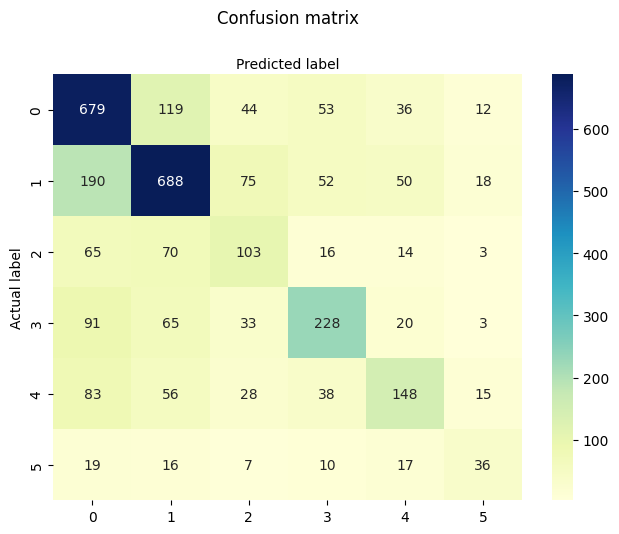

In [ ]:
confusion_matrix(cnf_matrix)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.60      0.72      0.66       943
     Sadness       0.68      0.64      0.66      1073
       Anger       0.36      0.38      0.37       271
        Fear       0.57      0.52      0.54       440
        Love       0.52      0.40      0.45       368
   Surprised       0.41      0.34      0.38       105

    accuracy                           0.59      3200
   macro avg       0.52      0.50      0.51      3200
weighted avg       0.59      0.59      0.58      3200



##### CounterVectorizer -- Unigram and Bigram(n2)

In [ ]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n2_nonlem)

In [ ]:
best_k = find_optimal_k(X_train, y_train, X_test, y_test)

In [ ]:
y_pred = KNN_model(X_train, y_train, X_test, best_k)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[679  87  75  61  28  13]
 [312 580  91  56  24  10]
 [ 81  50 109  25   6   0]
 [116  42  47 218  11   6]
 [ 94  27  37  42 156  12]
 [ 19   9   9  12  19  37]]


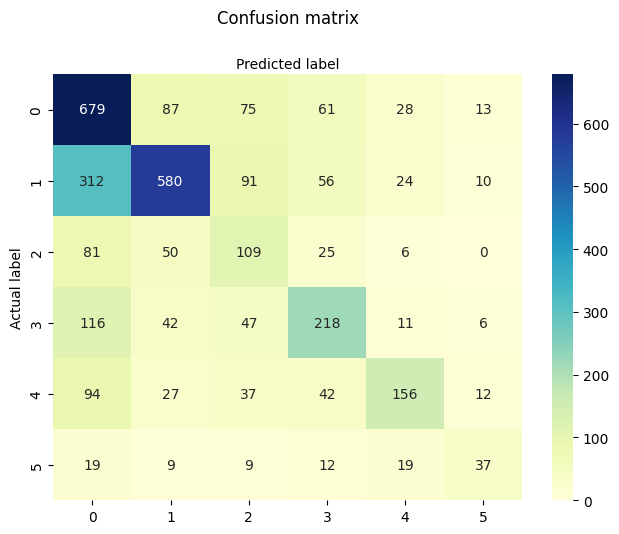

In [ ]:
confusion_matrix(cnf_matrix)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.52      0.72      0.61       943
     Sadness       0.73      0.54      0.62      1073
       Anger       0.30      0.40      0.34       271
        Fear       0.53      0.50      0.51       440
        Love       0.64      0.42      0.51       368
   Surprised       0.47      0.35      0.40       105

    accuracy                           0.56      3200
   macro avg       0.53      0.49      0.50      3200
weighted avg       0.59      0.56      0.56      3200



##### CounterVectorizer -- Bigram(n3)

In [ ]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n3_nonlem)

In [ ]:
best_k = find_optimal_k(X_train, y_train, X_test, y_test)

In [ ]:
y_pred = KNN_model(X_train, y_train, X_test, best_k)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[563  60   9 299  11   1]
 [205 447  10 399  12   0]
 [ 55  51  53 109   3   0]
 [107  28   6 296   3   0]
 [ 89  32   7 125 110   5]
 [ 23   6   2  57   7  10]]


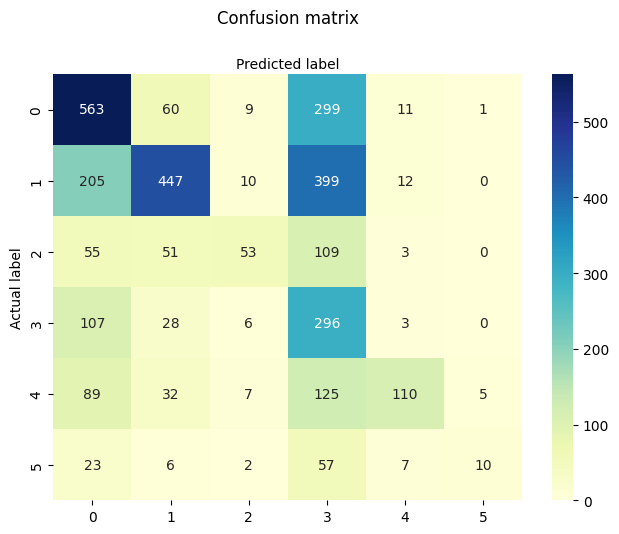

In [ ]:
confusion_matrix(cnf_matrix)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.54      0.60      0.57       943
     Sadness       0.72      0.42      0.53      1073
       Anger       0.61      0.20      0.30       271
        Fear       0.23      0.67      0.34       440
        Love       0.75      0.30      0.43       368
   Surprised       0.62      0.10      0.17       105

    accuracy                           0.46      3200
   macro avg       0.58      0.38      0.39      3200
weighted avg       0.59      0.46      0.47      3200



##### TfidfVectorizer -- Unigram(n1)

In [ ]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n1_nonlem)

In [ ]:
best_k = find_optimal_k(X_train, y_train, X_test, y_test)

In [ ]:
y_pred = KNN_model(X_train, y_train, X_test, best_k)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[869  48   1  18   7   0]
 [ 82 968   9   4   9   1]
 [ 42  98 122   8   1   0]
 [ 75  53   4 306   2   0]
 [ 44  40   3  15 261   5]
 [ 11  30   0   1  15  48]]


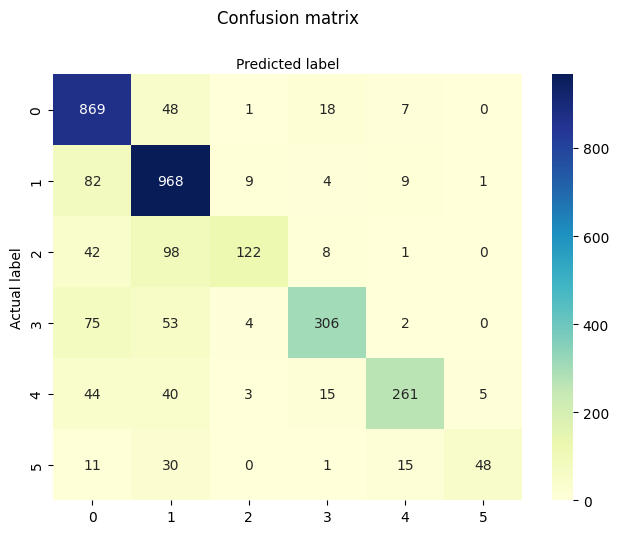

In [ ]:
confusion_matrix(cnf_matrix)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.77      0.92      0.84       943
     Sadness       0.78      0.90      0.84      1073
       Anger       0.88      0.45      0.60       271
        Fear       0.87      0.70      0.77       440
        Love       0.88      0.71      0.79       368
   Surprised       0.89      0.46      0.60       105

    accuracy                           0.80      3200
   macro avg       0.85      0.69      0.74      3200
weighted avg       0.82      0.80      0.80      3200



##### TfidfVectorizer -- Unigram and Bigram(n2)

In [ ]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n2_nonlem)

In [ ]:
best_k = find_optimal_k(X_train, y_train, X_test, y_test)

In [ ]:
y_pred = KNN_model(X_train, y_train, X_test, best_k)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[871  48   0  18   6   0]
 [133 920  10   7   3   0]
 [ 44  92 125   8   2   0]
 [106  55   3 273   3   0]
 [ 68  42   1  15 238   4]
 [ 21  24   0   1  15  44]]


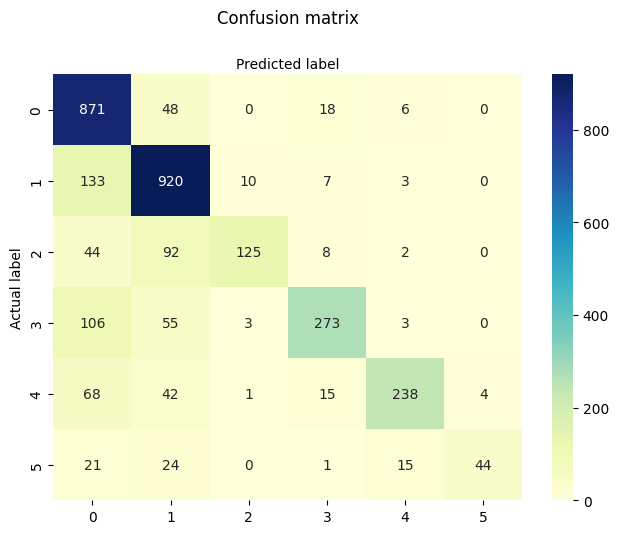

In [ ]:
confusion_matrix(cnf_matrix)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.70      0.92      0.80       943
     Sadness       0.78      0.86      0.82      1073
       Anger       0.90      0.46      0.61       271
        Fear       0.85      0.62      0.72       440
        Love       0.89      0.65      0.75       368
   Surprised       0.92      0.42      0.58       105

    accuracy                           0.77      3200
   macro avg       0.84      0.65      0.71      3200
weighted avg       0.79      0.77      0.76      3200



##### TfidfVectorizer -- Bigram(n3)

In [ ]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n3_nonlem)

In [ ]:
best_k = find_optimal_k(X_train, y_train, X_test, y_test)

In [ ]:
y_pred = KNN_model(X_train, y_train, X_test, best_k)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[660 164   0  94  24   1]
 [130 844   6  80  11   2]
 [ 34 119  82  34   2   0]
 [ 70  99   0 267   4   0]
 [ 53  71   1  38 203   2]
 [ 12  27   0  21  19  26]]


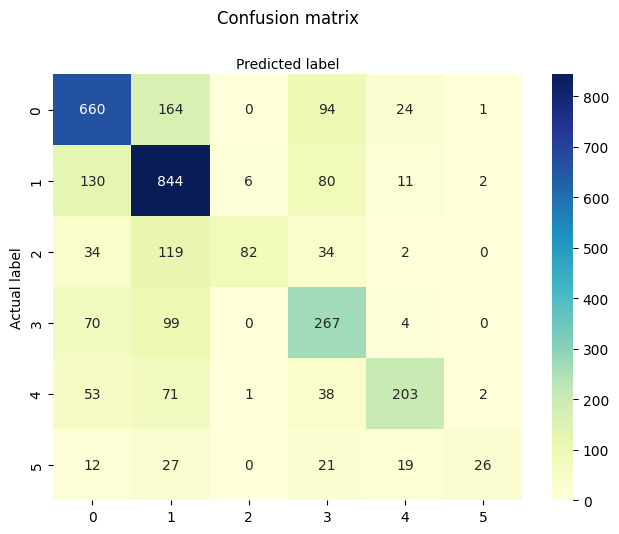

In [ ]:
confusion_matrix(cnf_matrix)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.69      0.70      0.69       943
     Sadness       0.64      0.79      0.70      1073
       Anger       0.92      0.30      0.46       271
        Fear       0.50      0.61      0.55       440
        Love       0.77      0.55      0.64       368
   Surprised       0.84      0.25      0.38       105

    accuracy                           0.65      3200
   macro avg       0.73      0.53      0.57      3200
weighted avg       0.68      0.65      0.64      3200



#### *Logistic Regression*

In [ ]:
# import LR model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
def LR_model(X_train, y_train, X_test, max_iter=1000):
  # Model Selection & Hyperparameter Tuning
  param_grid = {'C': [0.1, 0.5, 1, 2, 5]}
  logreg = LogisticRegression(random_state=16, max_iter=max_iter)
  grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
  grid_search.fit(X_train, y_train)
  y_pred = grid_search.best_estimator_.predict(X_test)

  return y_pred

##### CounterVectorizer -- Unigram(n1)

In [ ]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n1_nonlem)

In [ ]:
y_pred = LR_model(X_train, y_train, X_test)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[ 870   31    5   20   16    1]
 [  22 1002   33    6    5    5]
 [   4   59  204    3    1    0]
 [  25   20    4  381    7    3]
 [  21   16    4   14  307    6]
 [   1    7    1    1   18   77]]


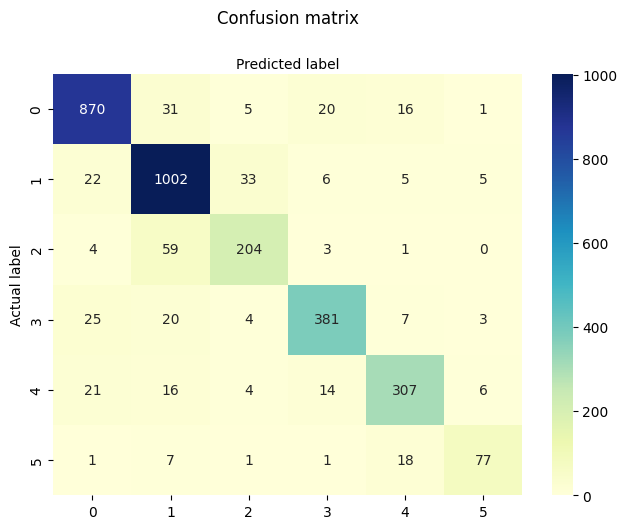

In [ ]:
confusion_matrix(cnf_matrix)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.92      0.92      0.92       943
     Sadness       0.88      0.93      0.91      1073
       Anger       0.81      0.75      0.78       271
        Fear       0.90      0.87      0.88       440
        Love       0.87      0.83      0.85       368
   Surprised       0.84      0.73      0.78       105

    accuracy                           0.89      3200
   macro avg       0.87      0.84      0.85      3200
weighted avg       0.89      0.89      0.89      3200



##### CounterVectorizer -- Unigram and Bigram(n2)

In [ ]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n2_nonlem)

In [ ]:
y_pred = LR_model(X_train, y_train, X_test)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[ 886   22    3   20   11    1]
 [  17 1014   33    3    3    3]
 [   3   56  208    3    1    0]
 [  21   23    3  385    6    2]
 [  17   14    2   14  310   11]
 [   1    9    1    1   18   75]]


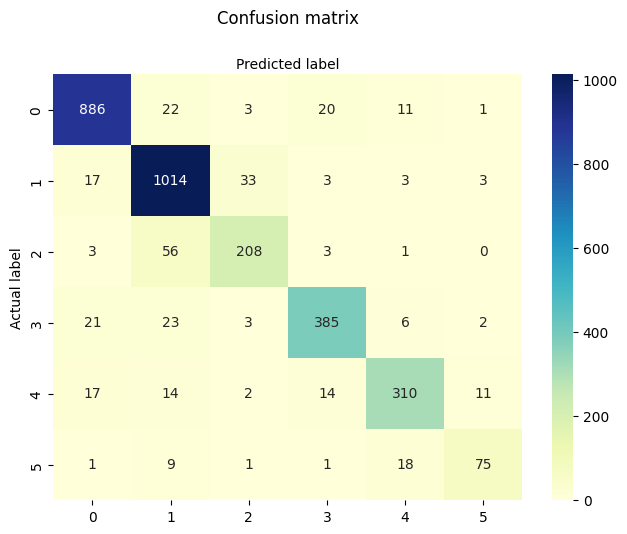

In [ ]:
confusion_matrix(cnf_matrix)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.94      0.94      0.94       943
     Sadness       0.89      0.95      0.92      1073
       Anger       0.83      0.77      0.80       271
        Fear       0.90      0.88      0.89       440
        Love       0.89      0.84      0.86       368
   Surprised       0.82      0.71      0.76       105

    accuracy                           0.90      3200
   macro avg       0.88      0.85      0.86      3200
weighted avg       0.90      0.90      0.90      3200



##### CounterVectorizer -- Bigram(n3)

In [ ]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n3_nonlem)

In [ ]:
y_pred = LR_model(X_train, y_train, X_test)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[726 184   0  24   9   0]
 [ 96 950  14   8   4   1]
 [ 24 141 101   3   2   0]
 [ 63 144   0 227   6   0]
 [ 47  87   0  10 219   5]
 [ 13  40   0   2  14  36]]


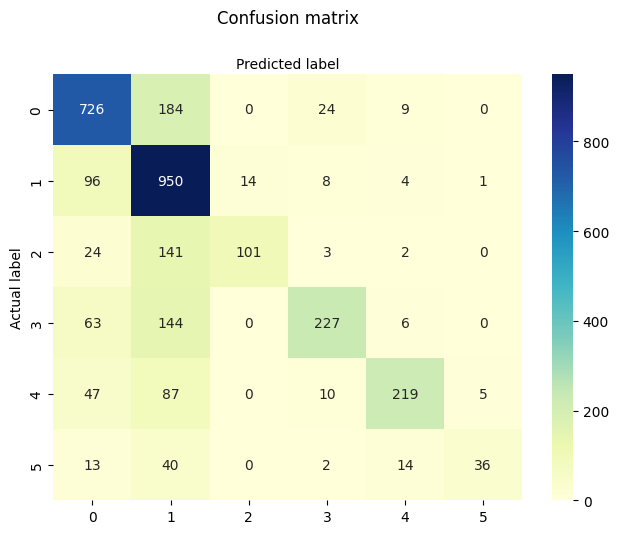

In [ ]:
confusion_matrix(cnf_matrix)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.75      0.77      0.76       943
     Sadness       0.61      0.89      0.73      1073
       Anger       0.88      0.37      0.52       271
        Fear       0.83      0.52      0.64       440
        Love       0.86      0.60      0.70       368
   Surprised       0.86      0.34      0.49       105

    accuracy                           0.71      3200
   macro avg       0.80      0.58      0.64      3200
weighted avg       0.74      0.71      0.70      3200



##### TfidfVectorizer -- Unigram(n1)

In [ ]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n1_nonlem)

In [ ]:
y_pred = LR_model(X_train, y_train, X_test)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[ 871   34    4   21   12    1]
 [  21 1017   19    7    5    4]
 [   6   74  185    5    1    0]
 [  28   28    5  372    6    1]
 [  20   24    3   16  299    6]
 [   6   16    1    3   20   59]]


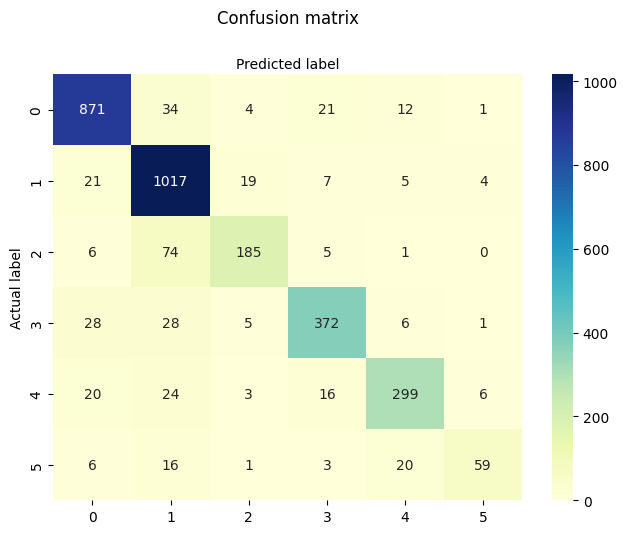

In [ ]:
confusion_matrix(cnf_matrix)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.91      0.92      0.92       943
     Sadness       0.85      0.95      0.90      1073
       Anger       0.85      0.68      0.76       271
        Fear       0.88      0.85      0.86       440
        Love       0.87      0.81      0.84       368
   Surprised       0.83      0.56      0.67       105

    accuracy                           0.88      3200
   macro avg       0.87      0.80      0.82      3200
weighted avg       0.88      0.88      0.87      3200



##### TfidfVectorizer -- Unigram and Bigram(n2)

In [ ]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n2_nonlem)

In [ ]:
y_pred = LR_model(X_train, y_train, X_test)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[ 883   39    1   13    7    0]
 [  13 1042   13    3    1    1]
 [  11   96  160    4    0    0]
 [  40   55    1  338    5    1]
 [  25   43    0   14  281    5]
 [   9   31    0    1   19   45]]


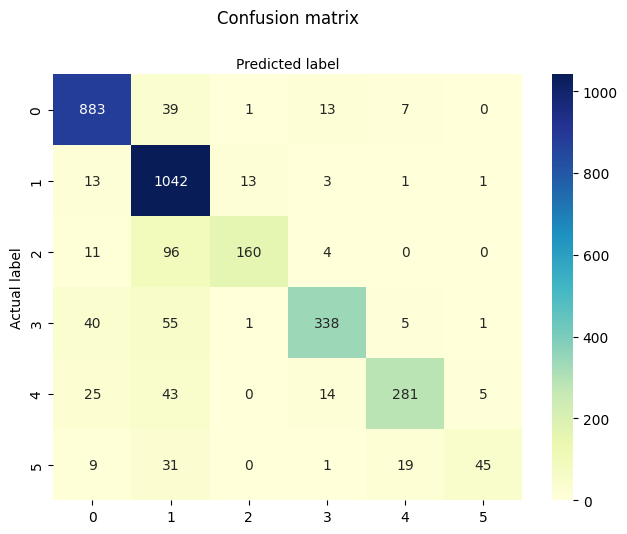

In [ ]:
confusion_matrix(cnf_matrix)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.90      0.94      0.92       943
     Sadness       0.80      0.97      0.88      1073
       Anger       0.91      0.59      0.72       271
        Fear       0.91      0.77      0.83       440
        Love       0.90      0.76      0.83       368
   Surprised       0.87      0.43      0.57       105

    accuracy                           0.86      3200
   macro avg       0.88      0.74      0.79      3200
weighted avg       0.87      0.86      0.85      3200



##### TfidfVectorizer -- Bigram(n3)

In [ ]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n3_nonlem)

In [ ]:
y_pred = LR_model(X_train, y_train, X_test)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[702 231   0   8   2   0]
 [ 71 998   3   1   0   0]
 [ 23 192  55   0   1   0]
 [ 66 199   0 174   1   0]
 [ 49 141   0   8 166   4]
 [ 14  63   0   1  15  12]]


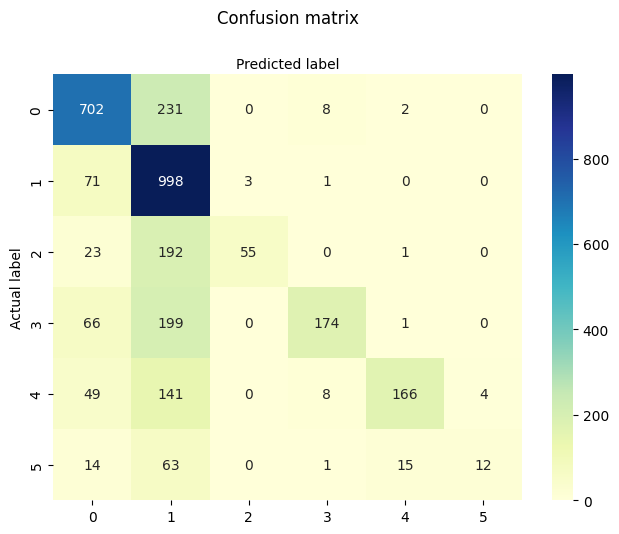

In [ ]:
confusion_matrix(cnf_matrix)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.76      0.74      0.75       943
     Sadness       0.55      0.93      0.69      1073
       Anger       0.95      0.20      0.33       271
        Fear       0.91      0.40      0.55       440
        Love       0.90      0.45      0.60       368
   Surprised       0.75      0.11      0.20       105

    accuracy                           0.66      3200
   macro avg       0.80      0.47      0.52      3200
weighted avg       0.74      0.66      0.63      3200



#### *Support Vector Machines (SVM)*

In [ ]:
# import SVM model
from sklearn import svm

In [ ]:
def SVM_model(X_train, y_train, X_test):
  # create a svm Classifier
  svm_classifier = svm.SVC(kernel='linear') # Linear Kernel

  # train the model using the training sets
  svm_classifier.fit(X_train, y_train)

  y_pred = svm_classifier.predict(X_test)

  return y_pred

##### CounterVectorizer -- Unigram(n1)

In [ ]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n1_nonlem)

In [ ]:
y_pred = SVM_model(X_train, y_train, X_test)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[856  28   8  28  18   5]
 [ 25 973  45  10  14   6]
 [  2  61 204   4   0   0]
 [ 30  12   7 384   5   2]
 [ 22   7   6  14 308  11]
 [  0   8   1   1  20  75]]


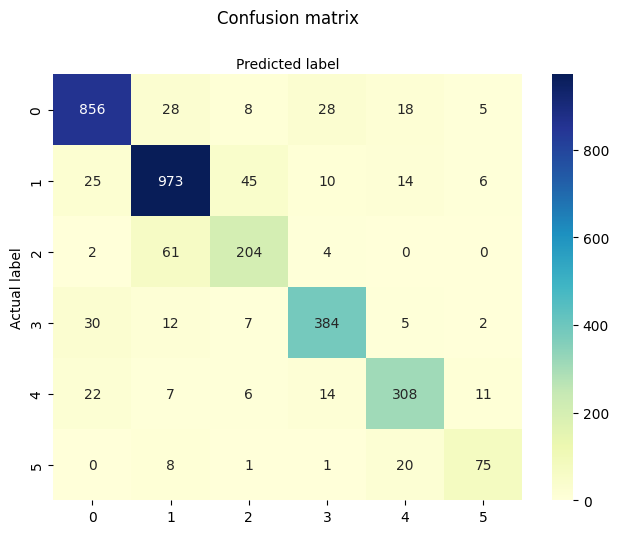

In [ ]:
confusion_matrix(cnf_matrix)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.92      0.91      0.91       943
     Sadness       0.89      0.91      0.90      1073
       Anger       0.75      0.75      0.75       271
        Fear       0.87      0.87      0.87       440
        Love       0.84      0.84      0.84       368
   Surprised       0.76      0.71      0.74       105

    accuracy                           0.88      3200
   macro avg       0.84      0.83      0.84      3200
weighted avg       0.87      0.88      0.87      3200



##### CounterVectorizer -- Unigram and Bigram(n2)

In [ ]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n2_nonlem)

In [ ]:
y_pred = SVM_model(X_train, y_train, X_test)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[ 869   20    9   23   16    6]
 [  15 1001   32    8   10    7]
 [   0   59  210    1    1    0]
 [  23   18    6  387    4    2]
 [  12   10    4   13  316   13]
 [   0    8    1    0   19   77]]


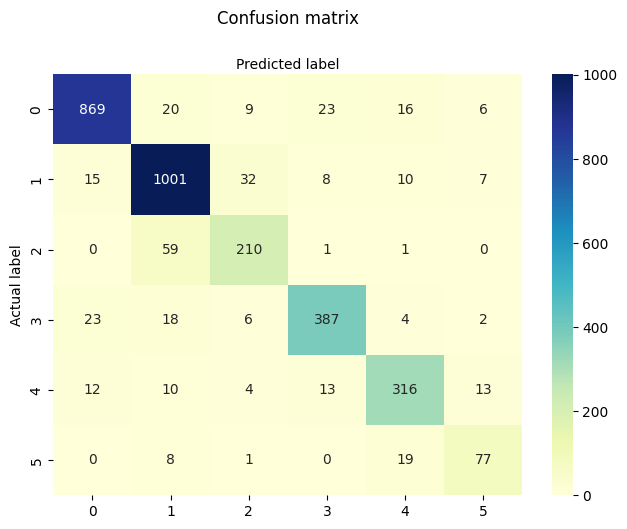

In [ ]:
confusion_matrix(cnf_matrix)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.95      0.92      0.93       943
     Sadness       0.90      0.93      0.91      1073
       Anger       0.80      0.77      0.79       271
        Fear       0.90      0.88      0.89       440
        Love       0.86      0.86      0.86       368
   Surprised       0.73      0.73      0.73       105

    accuracy                           0.89      3200
   macro avg       0.86      0.85      0.85      3200
weighted avg       0.89      0.89      0.89      3200



##### CounterVectorizer -- Bigram(n3)

In [ ]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n3_nonlem)

In [ ]:
y_pred = SVM_model(X_train, y_train, X_test)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[725 187   0  23   7   1]
 [ 99 942  10  14   7   1]
 [ 25 138 102   5   1   0]
 [ 56 149   1 228   6   0]
 [ 43  87   2  11 221   4]
 [ 12  39   0   2  14  38]]


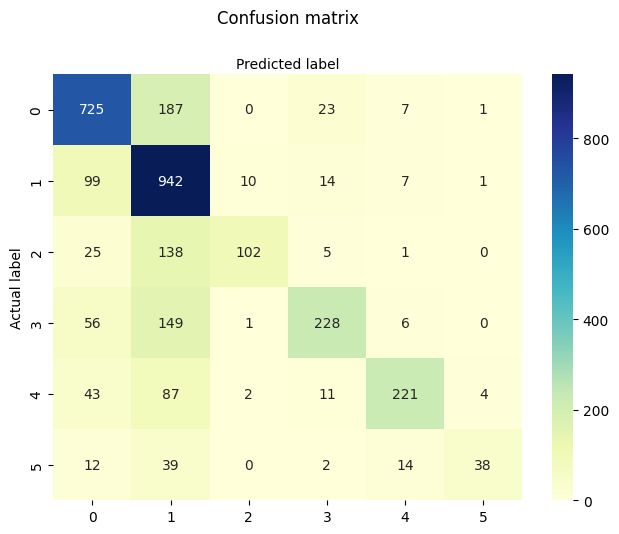

In [ ]:
confusion_matrix(cnf_matrix)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.76      0.77      0.76       943
     Sadness       0.61      0.88      0.72      1073
       Anger       0.89      0.38      0.53       271
        Fear       0.81      0.52      0.63       440
        Love       0.86      0.60      0.71       368
   Surprised       0.86      0.36      0.51       105

    accuracy                           0.70      3200
   macro avg       0.80      0.58      0.64      3200
weighted avg       0.74      0.70      0.70      3200



##### TfidfVectorizer -- Unigram(n1)

In [ ]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n1_nonlem)

In [ ]:
y_pred = SVM_model(X_train, y_train, X_test)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[ 865   30    6   21   17    4]
 [  26 1001   23    7   14    2]
 [   4   77  186    3    1    0]
 [  24   21    6  385    2    2]
 [  18   16    3   19  305    7]
 [   3   11    1    2   21   67]]


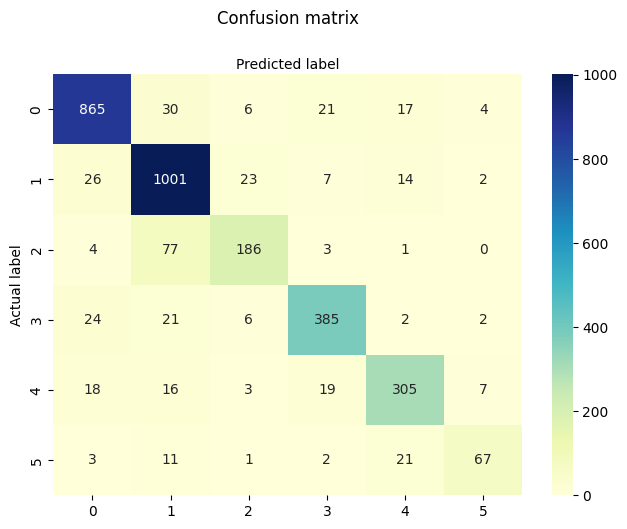

In [ ]:
confusion_matrix(cnf_matrix)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.92      0.92      0.92       943
     Sadness       0.87      0.93      0.90      1073
       Anger       0.83      0.69      0.75       271
        Fear       0.88      0.88      0.88       440
        Love       0.85      0.83      0.84       368
   Surprised       0.82      0.64      0.72       105

    accuracy                           0.88      3200
   macro avg       0.86      0.81      0.83      3200
weighted avg       0.88      0.88      0.88      3200



##### TfidfVectorizer -- Unigram and Bigram(n2)

In [ ]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n2_nonlem)

In [ ]:
y_pred = SVM_model(X_train, y_train, X_test)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[ 881   33    2   16   11    0]
 [  15 1036   13    2    6    1]
 [   5   96  168    2    0    0]
 [  35   39    4  360    1    1]
 [  20   32    1   15  297    3]
 [   3   23    0    1   20   58]]


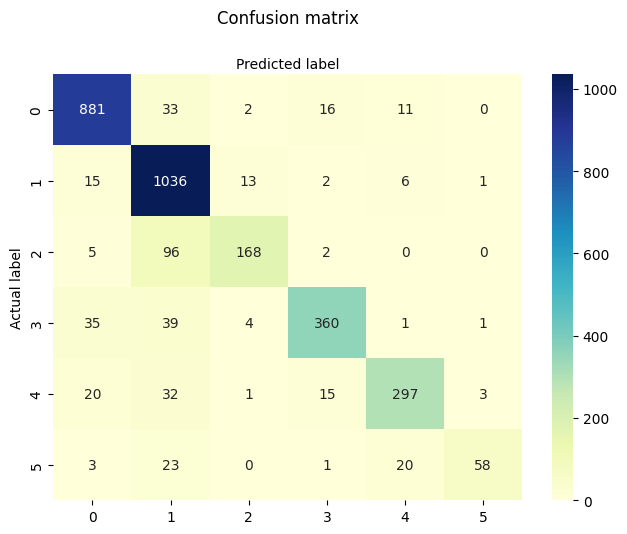

In [ ]:
confusion_matrix(cnf_matrix)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.92      0.93      0.93       943
     Sadness       0.82      0.97      0.89      1073
       Anger       0.89      0.62      0.73       271
        Fear       0.91      0.82      0.86       440
        Love       0.89      0.81      0.84       368
   Surprised       0.92      0.55      0.69       105

    accuracy                           0.88      3200
   macro avg       0.89      0.78      0.82      3200
weighted avg       0.88      0.88      0.87      3200



##### TfidfVectorizer -- Bigram(n3)

In [ ]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n3_nonlem)

In [ ]:
y_pred = SVM_model(X_train, y_train, X_test)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[ 696  237    0    8    2    0]
 [  64 1005    3    1    0    0]
 [  23  196   52    0    0    0]
 [  58  210    0  172    0    0]
 [  50  138    0    8  169    3]
 [  10   62    0    1   16   16]]


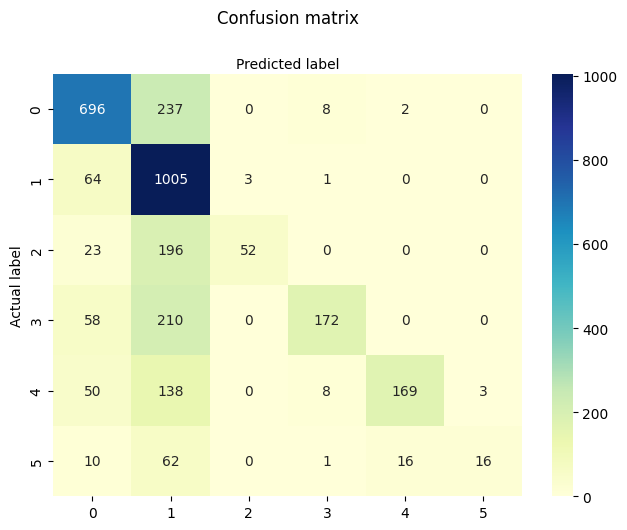

In [ ]:
confusion_matrix(cnf_matrix)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.77      0.74      0.75       943
     Sadness       0.54      0.94      0.69      1073
       Anger       0.95      0.19      0.32       271
        Fear       0.91      0.39      0.55       440
        Love       0.90      0.46      0.61       368
   Surprised       0.84      0.15      0.26       105

    accuracy                           0.66      3200
   macro avg       0.82      0.48      0.53      3200
weighted avg       0.75      0.66      0.63      3200



#### *Decision Tree*

In [ ]:
# import DT model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
def DT_model(X_train, y_train, X_test):
  # define the parameter grid
  param_grid = {'max_depth': [None, 10, 20, 30, 40, 50]}

  # create a decision tree classifier
  dt = DecisionTreeClassifier()

  # perform grid search
  grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
  grid_search.fit(X_train, y_train)

  # get the best parameters
  best_params = grid_search.best_params_

  # train the model using the best parameters
  dt = DecisionTreeClassifier(max_depth=best_params['max_depth'])
  dt.fit(X_train, y_train)

  y_pred = dt.predict(X_test)

  return y_pred

##### CounterVectorizer -- Unigram(n1)

In [ ]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n1_nonlem)

In [ ]:
y_pred = DT_model(X_train, y_train, X_test)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[841  18  11  36  29   8]
 [ 35 952  48  19  15   4]
 [  1  48 217   4   1   0]
 [ 13   5   6 402  12   2]
 [ 16   5   2  19 315  11]
 [  0   8   0   0  12  85]]


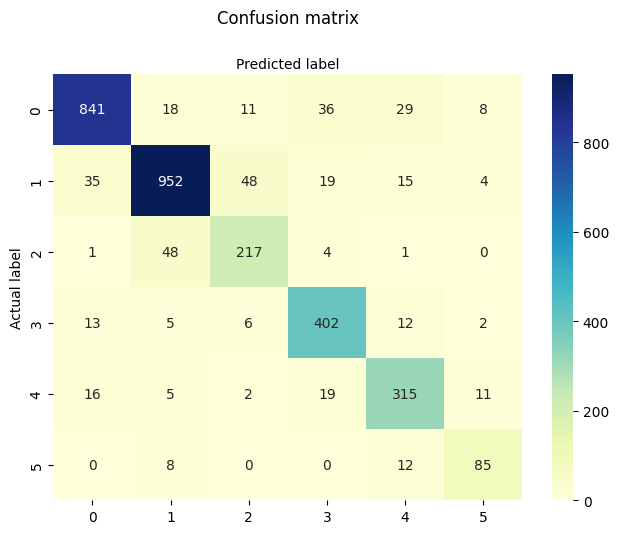

In [ ]:
confusion_matrix(cnf_matrix)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.93      0.89      0.91       943
     Sadness       0.92      0.89      0.90      1073
       Anger       0.76      0.80      0.78       271
        Fear       0.84      0.91      0.87       440
        Love       0.82      0.86      0.84       368
   Surprised       0.77      0.81      0.79       105

    accuracy                           0.88      3200
   macro avg       0.84      0.86      0.85      3200
weighted avg       0.88      0.88      0.88      3200



##### CounterVectorizer -- Unigram and Bigram(n2)

In [ ]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n2_nonlem)

In [ ]:
y_pred = DT_model(X_train, y_train, X_test)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[841  19   9  39  29   6]
 [ 36 961  34  21  17   4]
 [  2  50 214   4   1   0]
 [ 20   6   4 400   9   1]
 [ 13   3   1  21 318  12]
 [  1   9   0   0  12  83]]


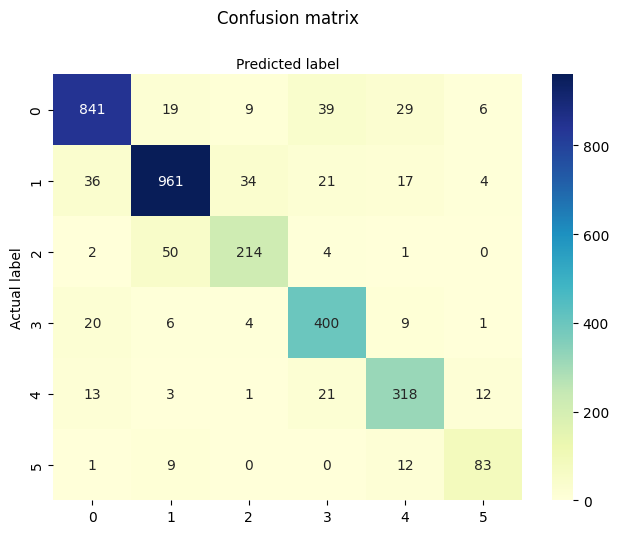

In [ ]:
confusion_matrix(cnf_matrix)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.92      0.89      0.91       943
     Sadness       0.92      0.90      0.91      1073
       Anger       0.82      0.79      0.80       271
        Fear       0.82      0.91      0.86       440
        Love       0.82      0.86      0.84       368
   Surprised       0.78      0.79      0.79       105

    accuracy                           0.88      3200
   macro avg       0.85      0.86      0.85      3200
weighted avg       0.88      0.88      0.88      3200



##### CounterVectorizer -- Bigram(n3)

In [ ]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n3_nonlem)

In [ ]:
y_pred = DT_model(X_train, y_train, X_test)

In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[655 168   6  94  18   2]
 [ 77 761  24 190  16   5]
 [ 12  86 121  47   5   0]
 [ 42  89   2 294  13   0]
 [ 36  63   1  44 212  12]
 [ 11  21   0  19  14  40]]


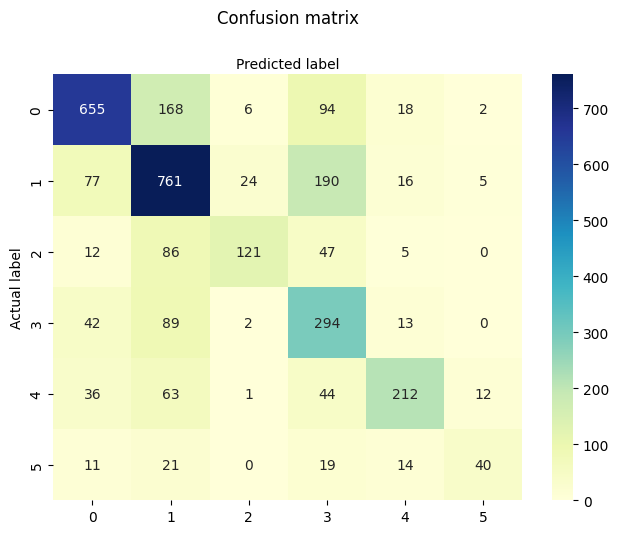

In [ ]:
confusion_matrix(cnf_matrix)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.79      0.69      0.74       943
     Sadness       0.64      0.71      0.67      1073
       Anger       0.79      0.45      0.57       271
        Fear       0.43      0.67      0.52       440
        Love       0.76      0.58      0.66       368
   Surprised       0.68      0.38      0.49       105

    accuracy                           0.65      3200
   macro avg       0.68      0.58      0.61      3200
weighted avg       0.68      0.65      0.65      3200



##### TfidfVectorizer -- Unigram(n1)

In [216]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n1_nonlem)

In [217]:
y_pred = DT_model(X_train, y_train, X_test)

In [218]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[845  17  11  35  29   6]
 [ 36 943  48  21  17   8]
 [  3  53 209   4   2   0]
 [ 14  17   5 386  16   2]
 [ 14   6   1  18 320   9]
 [  3   6   0   1  19  76]]


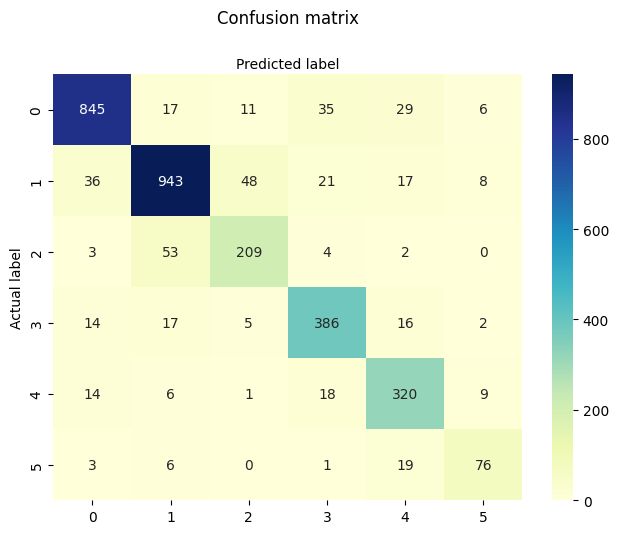

In [219]:
confusion_matrix(cnf_matrix)

In [220]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.92      0.90      0.91       943
     Sadness       0.90      0.88      0.89      1073
       Anger       0.76      0.77      0.77       271
        Fear       0.83      0.88      0.85       440
        Love       0.79      0.87      0.83       368
   Surprised       0.75      0.72      0.74       105

    accuracy                           0.87      3200
   macro avg       0.83      0.84      0.83      3200
weighted avg       0.87      0.87      0.87      3200



##### TfidfVectorizer -- Unigram and Bigram(n2)

In [221]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n2_nonlem)

In [222]:
y_pred = DT_model(X_train, y_train, X_test)

In [223]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[838  27  10  34  28   6]
 [ 35 944  48  21  18   7]
 [  1  47 217   3   2   1]
 [  8  13   6 396  15   2]
 [ 11  10   1  20 319   7]
 [  1   7   0   1  19  77]]


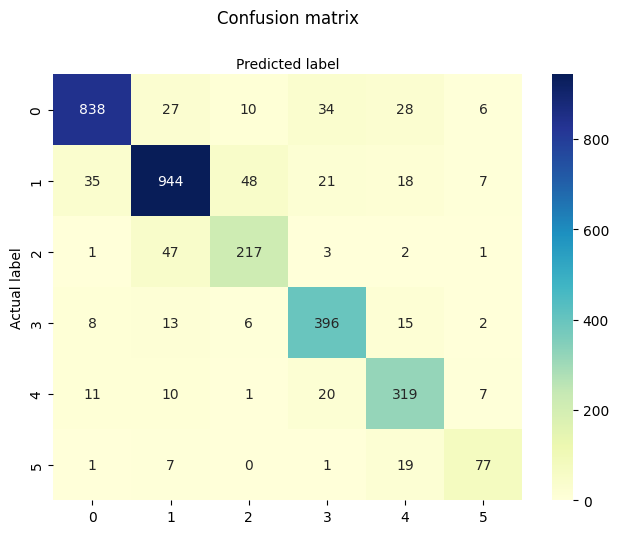

In [224]:
confusion_matrix(cnf_matrix)

In [225]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.94      0.89      0.91       943
     Sadness       0.90      0.88      0.89      1073
       Anger       0.77      0.80      0.78       271
        Fear       0.83      0.90      0.87       440
        Love       0.80      0.87      0.83       368
   Surprised       0.77      0.73      0.75       105

    accuracy                           0.87      3200
   macro avg       0.83      0.84      0.84      3200
weighted avg       0.87      0.87      0.87      3200



##### TfidfVectorizer -- Bigram(n3)

In [226]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n3_nonlem)

In [227]:
y_pred = DT_model(X_train, y_train, X_test)

In [228]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[614 166   7 117  32   7]
 [ 92 723  32 199  21   6]
 [ 25  86 113  42   4   1]
 [ 60  74   3 286  17   0]
 [ 37  55   4  53 207  12]
 [ 10  21   0  15  18  41]]


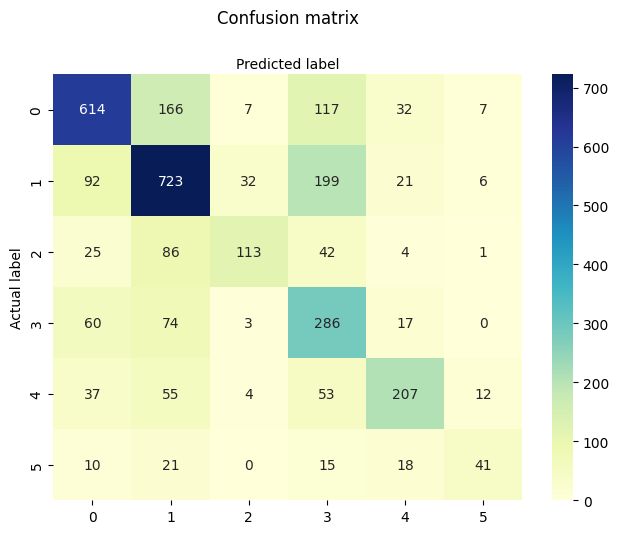

In [229]:
confusion_matrix(cnf_matrix)

In [230]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.73      0.65      0.69       943
     Sadness       0.64      0.67      0.66      1073
       Anger       0.71      0.42      0.53       271
        Fear       0.40      0.65      0.50       440
        Love       0.69      0.56      0.62       368
   Surprised       0.61      0.39      0.48       105

    accuracy                           0.62      3200
   macro avg       0.63      0.56      0.58      3200
weighted avg       0.65      0.62      0.62      3200



#### *Random Forest*

In [231]:
# import RF model
from sklearn.ensemble import RandomForestClassifier

In [232]:
def RF_model(X_train, y_train, X_test):
  # instantiate the model
  rf = RandomForestClassifier()

  # fit the model with data
  rf.fit(X_train, y_train)

  y_pred = rf.predict(X_test)

  return y_pred

##### CounterVectorizer -- Unigram(n1)

In [233]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n1_nonlem)

In [234]:
y_pred = RF_model(X_train, y_train, X_test)

In [235]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[851  24   6  34  22   6]
 [ 23 984  34  11  17   4]
 [  1  60 205   4   1   0]
 [ 10  18   5 400   7   0]
 [ 11  13   3  12 317  12]
 [  0   9   0   2  12  82]]


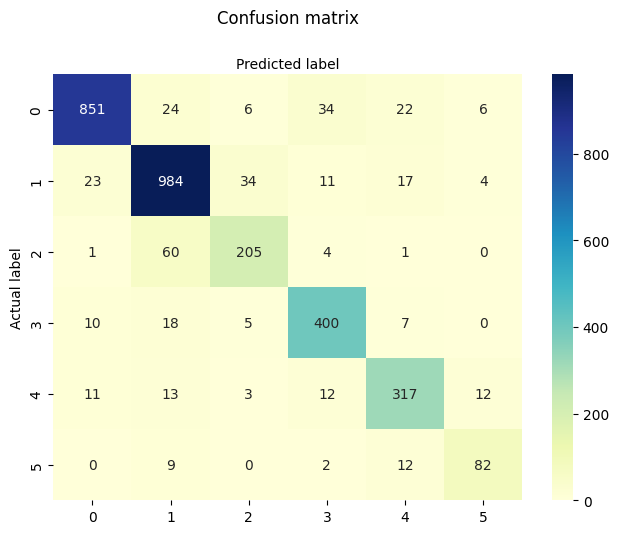

In [236]:
confusion_matrix(cnf_matrix)

In [237]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.95      0.90      0.93       943
     Sadness       0.89      0.92      0.90      1073
       Anger       0.81      0.76      0.78       271
        Fear       0.86      0.91      0.89       440
        Love       0.84      0.86      0.85       368
   Surprised       0.79      0.78      0.78       105

    accuracy                           0.89      3200
   macro avg       0.86      0.85      0.86      3200
weighted avg       0.89      0.89      0.89      3200



##### CounterVectorizer -- Unigram and Bigram(n2)



In [238]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n2_nonlem)

In [239]:
y_pred = RF_model(X_train, y_train, X_test)

In [240]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[ 860   31    5   29   17    1]
 [  15 1012   22    8   10    6]
 [   3   61  205    1    1    0]
 [  13   22    5  396    4    0]
 [   7    8    2   16  321   14]
 [   0    7    0    1   14   83]]


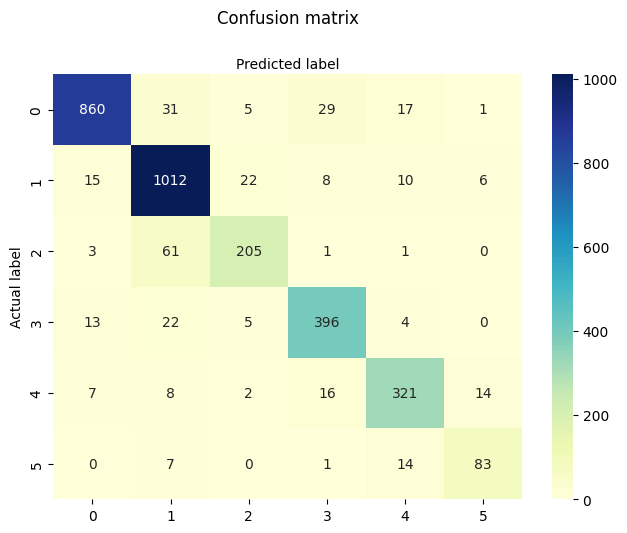

In [241]:
confusion_matrix(cnf_matrix)

In [242]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.96      0.91      0.93       943
     Sadness       0.89      0.94      0.91      1073
       Anger       0.86      0.76      0.80       271
        Fear       0.88      0.90      0.89       440
        Love       0.87      0.87      0.87       368
   Surprised       0.80      0.79      0.79       105

    accuracy                           0.90      3200
   macro avg       0.88      0.86      0.87      3200
weighted avg       0.90      0.90      0.90      3200



##### CounterVectorizer -- Bigram(n3)

In [243]:
X_train, X_test, y_train, y_test = split_X_y(X_CV_n3_nonlem)

In [244]:
y_pred = RF_model(X_train, y_train, X_test)

In [245]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[625 212   1  96   9   0]
 [ 39 825  17 185   5   2]
 [  8 107 115  41   0   0]
 [ 37 114   0 286   3   0]
 [ 25  78   0  46 210   9]
 [ 10  26   0  14  11  44]]


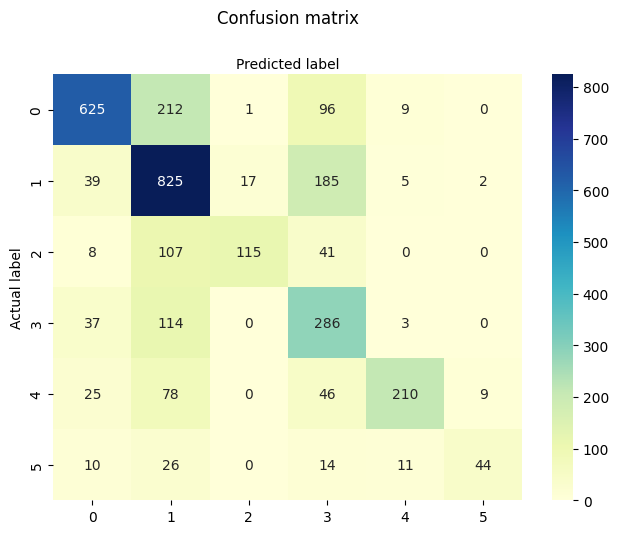

In [246]:
confusion_matrix(cnf_matrix)

In [247]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.84      0.66      0.74       943
     Sadness       0.61      0.77      0.68      1073
       Anger       0.86      0.42      0.57       271
        Fear       0.43      0.65      0.52       440
        Love       0.88      0.57      0.69       368
   Surprised       0.80      0.42      0.55       105

    accuracy                           0.66      3200
   macro avg       0.74      0.58      0.62      3200
weighted avg       0.71      0.66      0.66      3200



##### TfidfVectorizer -- Unigram(n1)

In [248]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n1_nonlem)

In [249]:
y_pred = RF_model(X_train, y_train, X_test)

In [250]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[851  36   7  28  19   2]
 [ 22 990  30  11  18   2]
 [  1  76 188   5   1   0]
 [ 13  28   2 383  13   1]
 [ 11  14   2  14 322   5]
 [  2   9   0   3  22  69]]


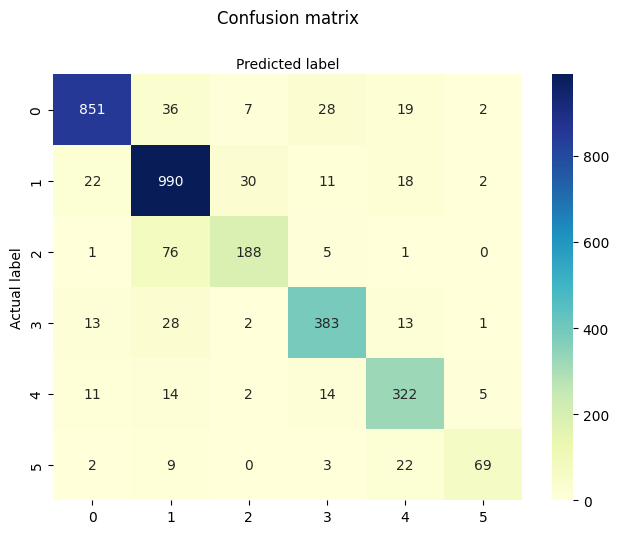

In [251]:
confusion_matrix(cnf_matrix)

In [252]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.95      0.90      0.92       943
     Sadness       0.86      0.92      0.89      1073
       Anger       0.82      0.69      0.75       271
        Fear       0.86      0.87      0.87       440
        Love       0.82      0.88      0.84       368
   Surprised       0.87      0.66      0.75       105

    accuracy                           0.88      3200
   macro avg       0.86      0.82      0.84      3200
weighted avg       0.88      0.88      0.87      3200



##### TfidfVectorizer -- Unigram and Bigram(n2)

In [253]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n2_nonlem)

In [254]:
y_pred = RF_model(X_train, y_train, X_test)

In [255]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[ 853   51    5   24   10    0]
 [  11 1037   14    4    5    2]
 [   3   78  187    2    1    0]
 [  12   33    4  378   12    1]
 [  16   25    2   12  306    7]
 [   1   12    0    3   20   69]]


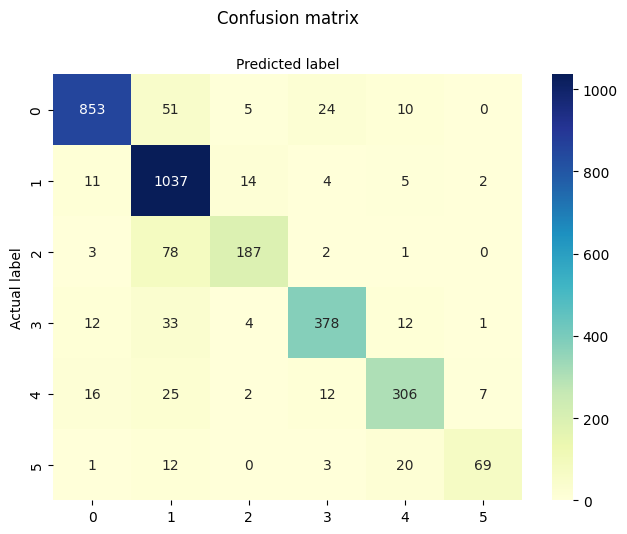

In [256]:
confusion_matrix(cnf_matrix)

In [257]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.95      0.90      0.93       943
     Sadness       0.84      0.97      0.90      1073
       Anger       0.88      0.69      0.77       271
        Fear       0.89      0.86      0.88       440
        Love       0.86      0.83      0.85       368
   Surprised       0.87      0.66      0.75       105

    accuracy                           0.88      3200
   macro avg       0.88      0.82      0.85      3200
weighted avg       0.89      0.88      0.88      3200



##### TfidfVectorizer -- Bigram(n3)

In [258]:
X_train, X_test, y_train, y_test = split_X_y(X_TfIdf_n3_nonlem)

In [259]:
y_pred = RF_model(X_train, y_train, X_test)

In [260]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[605 232   1  96   9   0]
 [ 44 840  14 170   5   0]
 [  9 110 113  38   1   0]
 [ 32 123   0 275  10   0]
 [ 23  90   0  43 207   5]
 [  7  32   0  17  15  34]]


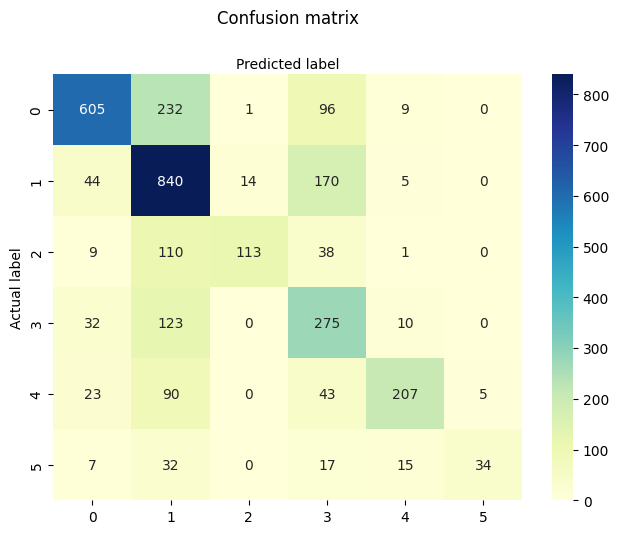

In [261]:
confusion_matrix(cnf_matrix)

In [262]:
from sklearn.metrics import classification_report
target_names = ['Joy', 'Sadness', 'Anger', 'Fear', 'Love', 'Surprised']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Joy       0.84      0.64      0.73       943
     Sadness       0.59      0.78      0.67      1073
       Anger       0.88      0.42      0.57       271
        Fear       0.43      0.62      0.51       440
        Love       0.84      0.56      0.67       368
   Surprised       0.87      0.32      0.47       105

    accuracy                           0.65      3200
   macro avg       0.74      0.56      0.60      3200
weighted avg       0.70      0.65      0.65      3200

